In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - partner_iv

In [3]:
xlsx = pd.ExcelFile(
    "../../../data/raw/partner_iv/DB_Master_CP1_latest.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [4]:
xlsx.sheet_names

['DB0 Kiln',
 'DB1 Fuels emissions',
 'DB2 Clinker',
 'DB3 Cement',
 'raw meal 45 mi kiln A ',
 'raw meal 45 mi kiln B',
 'Hot raw meal 1 per day Kiln A',
 'Hot raw meal 1 per day Kiln B',
 'Clinker BU 1 per day Klin A',
 'Clinker BU 1 per day Klin B',
 'Cem A produc control',
 'Cem A exp control',
 'Cem B produc control',
 'Cem B exp control',
 'Cem C produc control',
 'Cem c exp control',
 'Petcoke composite sample 4 mont',
 'petcoke powder',
 'AF comp samp 4 months',
 'AF 1 daily',
 'AF 2 daily',
 'AF 3 daily']

<IPython.core.display.Javascript object>

In [5]:
len(xlsx.sheet_names)

22

<IPython.core.display.Javascript object>

In [6]:
production = []
expediction = []

<IPython.core.display.Javascript object>

## Cem A produc control

In [7]:
df = pd.read_excel(xlsx, sheet_name="Cem A produc control", skiprows=[1, 2])
df = df[[col for col in df.columns if "Unnamed" not in col]]
production.append(df)

<IPython.core.display.Javascript object>

In [8]:
df.shape

(231, 46)

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM A prod control                   231 non-null    object        
 1   codlab                               231 non-null    object        
 2   sigla                                231 non-null    int64         
 3   data                                 231 non-null    datetime64[ns]
 4   LOI                                  213 non-null    float64       
 5   SO3                                  229 non-null    float64       
 6   Cl-                                  229 non-null    float64       
 7   Blaine                               221 non-null    float64       
 8   ph2oimm                              0 non-null      float64       
 9   Initial Setting Time                 0 non-null      float64       
 10  Soundness     

<IPython.core.display.Javascript object>

In [10]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [11]:
df.describe().T

count                           mean  \
sigla                                231.0                   12833.935065   
data                                   231  2020-10-30 11:31:56.883116800   
LOI                                  213.0                       2.774742   
SO3                                  229.0                       2.650742   
Cl-                                  229.0                       0.025694   
Blaine                               221.0                    3432.076923   
ph2oimm                                0.0                            NaN   
Initial Setting Time                   0.0                            NaN   
Soundness                              0.0                            NaN   
flow                                   0.0                            NaN   
rihcl                                  0.0                            NaN   
2 days strenght                      227.0                      29.897797   
7 days strenght                      220.0                      42.968636   
28 days strenght                     225.0                          54.55   
residuo 24 micron                    226.0                       36.29115   
tratt. 32 µm                         158.0                       11.45462   
tratt. 40 µm                         158.0                       3.945759   
tratt. 63 µm                         158.0                       0.633038   
SampleName                           231.0                   12833.935065   
R_wp                                 221.0                       5.527014   
Alite_M3 C3S M3                      221.0                       32.88181   
Alite_M1 C3S M1                      221.0                       32.43457   
Alite_Sum C3S tot                    221.0                      65.315928   
Ratio_M1 (rapporto M1/M3)            221.0                      49.723756   
C3S_CS (taglia dei cristalliti C3S)  221.0                     239.600814   
Belite_beta                          221.0                       9.200498   
C3A cub                              221.0                       2.172489   
C3A ortho                            221.0                       2.298643   
C3A tot                              221.0                       4.469955   
C4AF                                 221.0                       11.51724   
CaO                                  221.0                        0.71362   
Ca(OH)2                              221.0                       0.404299   
Calce libera                         221.0                       1.019231   
Periclasio (MgO)                     221.0                       0.434525   
Quartz                               221.0                       0.166561   
K2SO4                                221.0                       1.106018   
Langbeinite – MgK2(SO4)2             221.0                       0.124389   
Aphthitalite – (K,Na)3(SO4)2         221.0                        0.74457   
Gesso                                221.0                       1.755701   
Emiidrato                            221.0                       0.013394   
Anidrite                             221.0                        0.43819   
Calcite – CaCO3                      221.0                       3.600271   
SO3_XRD                              221.0                       2.013982   
CO2_XRD                              221.0                       1.582805   

                                                     min                  25%  \
sigla                                             7619.0              10287.0   
data                                 2019-01-14 00:00:00  2019-11-21 12:00:00   
LOI                                                 1.07                  2.3   
SO3                                                 2.16                 2.54   
Cl-                                                0.011                0.017   
Blaine                                            2767.0               3249.0   
ph2o

<IPython.core.display.Javascript object>

In [12]:
df.describe(exclude="number").T

count unique           top freq  \
CEM A prod control   231      1         CEM A  231   
codlab               231      1  prod control  231   
data                 231    NaN           NaN  NaN   

                                             mean                  min  \
CEM A prod control                            NaN                  NaN   
codlab                                        NaN                  NaN   
data                2020-10-30 11:31:56.883116800  2019-01-14 00:00:00   

                                    25%                  50%  \
CEM A prod control                  NaN                  NaN   
codlab                              NaN                  NaN   
data                2019-11-21 12:00:00  2020-11-02 00:00:00   

                                    75%                  max  
CEM A prod control                  NaN                  NaN  
codlab                              NaN                  NaN  
data                2021-09-23 12:00:00  2022-11-14 00:00:00

<IPython.core.display.Javascript object>

## Cem B produc control

In [13]:
df = pd.read_excel(xlsx, sheet_name="Cem B produc control", skiprows=[1, 2])
df = df[[col for col in df.columns if "Unnamed" not in col]]
production.append(df)

<IPython.core.display.Javascript object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM B prod control                   193 non-null    object        
 1   sigla                                192 non-null    float64       
 2   data                                 193 non-null    datetime64[ns]
 3   LOI                                  184 non-null    float64       
 4   SO3                                  193 non-null    float64       
 5   Cl-                                  193 non-null    float64       
 6   Blaine                               189 non-null    float64       
 7   ph2oimm                              0 non-null      float64       
 8   Initial Setting Time                 0 non-null      float64       
 9   Soundness                            0 non-null      float64       
 10  flow          

<IPython.core.display.Javascript object>

In [15]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [16]:
df.describe().T

count                           mean  \
sigla                                192.0                   13949.854167   
data                                   193  2021-03-28 20:46:00.621761536   
LOI                                  184.0                       4.470054   
SO3                                  193.0                       3.246114   
Cl-                                  193.0                       0.057668   
Blaine                               189.0                    3322.417989   
ph2oimm                                0.0                            NaN   
Initial Setting Time                   0.0                            NaN   
Soundness                              0.0                            NaN   
flow                                   0.0                            NaN   
rihcl                                  0.0                            NaN   
2 days strenght                      191.0                      30.785864   
7 days strenght                      184.0                      42.444022   
28 days strenght                     189.0                      52.180952   
residuo 24 micron                    191.0                      36.519581   
tratt. 32 µm                         126.0                       12.64127   
tratt. 40 µm                         127.0                       4.614567   
tratt. 63 µm                         127.0                       0.971654   
SampleName                           193.0                    13877.57513   
R_wp                                 191.0                       5.568691   
Alite_M3 C3S M3                      191.0                      29.973141   
Alite_M1 C3S M1                      191.0                      30.426126   
Alite_Sum C3S tot                    191.0                       60.39822   
Ratio_M1 (rapporto M1/M3)            191.0                      50.414925   
C3S_CS (taglia dei cristalliti C3S)  191.0                     237.936702   
Belite_beta                          191.0                       8.361257   
C3A cub                              191.0                       2.154084   
C3A ortho                            191.0                       2.185236   
C3A tot                              191.0                       4.337696   
C4AF                                 191.0                      10.580785   
CaO                                  191.0                       1.571361   
Ca(OH)2                              191.0                       0.528743   
Calce libera                         191.0                       1.970628   
Periclasio (MgO)                     191.0                       0.455497   
Quartz                               191.0                       0.449843   
K2SO4                                191.0                       1.165916   
Langbeinite – MgK2(SO4)2             191.0                       0.207906   
Aphthitalite – (K,Na)3(SO4)2         191.0                       0.807277   
Gesso                                191.0                       2.182984   
Emiidrato                            191.0                       0.014503   
Anidrite                             191.0                       0.770838   
Calcite – CaCO3                      191.0                       8.136492   
SO3_XRD                              191.0                       2.509162   
CO2_XRD                              191.0                       3.577592   

                                                     min                  25%  \
sigla                                             9942.0             12010.75   
data                                 2019-10-07 00:00:00  2020-07-13 00:00:00   
LOI                                                 2.44               3.8075   
SO3                                                 2.41                  3.0   
Cl-                                                 0.01                0.049   
Blaine                                            2875.0               3193.0   
ph2o

<IPython.core.display.Javascript object>

In [17]:
df.describe(exclude="number").T

count unique          top freq  \
CEM B prod control   193      1        CEM B  193   
data                 193    NaN          NaN  NaN   
Date                 190    160  16-Oct-2019    3   
ora                  189    189     14:04:54    1   

                                             mean                  min  \
CEM B prod control                            NaN                  NaN   
data                2021-03-28 20:46:00.621761536  2019-10-07 00:00:00   
Date                                          NaN                  NaN   
ora                                           NaN                  NaN   

                                    25%                  50%  \
CEM B prod control                  NaN                  NaN   
data                2020-07-13 00:00:00  2021-02-22 00:00:00   
Date                                NaN                  NaN   
ora                                 NaN                  NaN   

                                    75%                  max  
CEM B prod control                  NaN                  NaN  
data                2021-12-20 00:00:00  2022-11-07 00:00:00  
Date                                NaN                  NaN  
ora                                 NaN                  NaN

<IPython.core.display.Javascript object>

## Cem C produc control

In [18]:
df = pd.read_excel(xlsx, sheet_name="Cem C produc control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]
production.append(df)

<IPython.core.display.Javascript object>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM C production control             156 non-null    object        
 1   codlab                               156 non-null    object        
 2   sigla                                156 non-null    int64         
 3   data                                 156 non-null    datetime64[ns]
 4   LOI                                  149 non-null    float64       
 5   SO3                                  156 non-null    float64       
 6   Cl-                                  155 non-null    float64       
 7   Blaine                               150 non-null    float64       
 8   ph2oimm                              0 non-null      float64       
 9   Initial Setting Time                 0 non-null      float64       
 10  Soundness     

<IPython.core.display.Javascript object>

In [20]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [21]:
df.describe().T

count                           mean  \
sigla                                156.0                   14115.102564   
data                                   156  2021-04-18 02:46:09.230769152   
LOI                                  149.0                       9.909396   
SO3                                  156.0                       3.076987   
Cl-                                  155.0                         0.0666   
Blaine                               150.0                    3775.193333   
ph2oimm                                0.0                            NaN   
Initial Setting Time                   0.0                            NaN   
Soundness                              0.0                            NaN   
flow                                   0.0                            NaN   
rihcl                                  0.0                            NaN   
2 days strenght                      153.0                      22.450327   
7 days strenght                        0.0                            NaN   
28 days strenght                     153.0                      40.880392   
residuo 24 micron                    156.0                       39.84359   
tratt. 32 µm                          97.0                      20.725258   
tratt. 40 µm                          97.0                       9.410825   
tratt. 63 µm                          97.0                       2.453093   
SampleName                           156.0                   14115.102564   
R_wp                                 152.0                       5.725724   
Alite_M3 C3S M3                      152.0                      23.634145   
Alite_M1 C3S M1                      152.0                      25.375987   
Alite_Sum C3S tot                    152.0                      49.009013   
Ratio_M1 (rapporto M1/M3)            152.0                      51.818487   
C3S_CS (taglia dei cristalliti C3S)  152.0                     246.756842   
Belite_beta                          152.0                       7.095329   
C3A cub                              152.0                       1.724868   
C3A ortho                            152.0                       1.889013   
C3A tot                              152.0                       3.612434   
C4AF                                 152.0                       8.299803   
CaO                                  152.0                       1.380066   
Ca(OH)2                              152.0                       0.510789   
Calce libera                         152.0                       1.765197   
Periclasio (MgO)                     152.0                       0.448421   
Quartz                               152.0                       1.018289   
K2SO4                                152.0                       1.166053   
Langbeinite – MgK2(SO4)2             152.0                       0.424605   
Aphthitalite – (K,Na)3(SO4)2         152.0                         0.7125   
Gesso                                152.0                       2.526974   
Emiidrato                            152.0                       0.010461   
Anidrite                             152.0                       0.640855   
Calcite – CaCO3                      152.0                      23.149342   
SO3_XRD                              152.0                       2.663487   
CO2_XRD                              152.0                      10.178882   

                                                     min                  25%  \
sigla                                            10037.0             12119.75   
data                                 2019-10-21 00:00:00  2020-07-27 00:00:00   
LOI                                                 6.77                 9.26   
SO3                                                 2.55               2.9175   
Cl-                                                0.015                0.059   
Blaine                                            2759.0              3407.25   
ph2o

<IPython.core.display.Javascript object>

In [22]:
df.describe(exclude="number").T

count unique           top freq  \
CEM C production control   156      1         CEM C  156   
codlab                     156      1  prod control  156   
data                       156    NaN           NaN  NaN   

                                                   mean                  min  \
CEM C production control                            NaN                  NaN   
codlab                                              NaN                  NaN   
data                      2021-04-18 02:46:09.230769152  2019-10-21 00:00:00   

                                          25%                  50%  \
CEM C production control                  NaN                  NaN   
codlab                                    NaN                  NaN   
data                      2020-07-27 00:00:00  2021-04-09 00:00:00   

                                          75%                  max  
CEM C production control                  NaN                  NaN  
codlab                                    NaN                  NaN  
data                      2022-01-18 18:00:00  2022-11-07 00:00:00

<IPython.core.display.Javascript object>

## Cem A exp control

In [23]:
df = pd.read_excel(xlsx, sheet_name="Cem A exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]
expediction.append(df)

<IPython.core.display.Javascript object>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM A expedition control             322 non-null    object        
 1   sigla                                322 non-null    int64         
 2   data                                 322 non-null    datetime64[ns]
 3   LOI                                  258 non-null    object        
 4   SO3                                  322 non-null    float64       
 5   Cl-                                  322 non-null    float64       
 6   Blaine                               321 non-null    float64       
 7   ph2oimm                              320 non-null    float64       
 8   Initial Setting Time                 319 non-null    float64       
 9   Soundness                            318 non-null    float64       
 10  flow          

<IPython.core.display.Javascript object>

In [25]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [26]:
df.describe().T

count                           mean  \
sigla                                322.0                   14288.031056   
data                                   322  2021-05-09 05:30:55.900621056   
SO3                                  322.0                       2.613851   
Cl-                                  322.0                       0.022149   
Blaine                               321.0                    3482.442368   
ph2oimm                              320.0                       28.47375   
Initial Setting Time                 319.0                     213.056426   
Soundness                            318.0                       0.610063   
flow                                 318.0                     112.160377   
rihcl                                 63.0                       0.327302   
2 days strenght                      322.0                      30.645652   
7 days strenght                        0.0                            NaN   
28 days strenght                     315.0                      54.311111   
residuo 24 micron                    321.0                      35.649938   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           321.0                   14274.691589   
R_wp                                 294.0                       5.528367   
Alite_M3 C3S M3                      294.0                      32.582823   
Alite_M1 C3S M1                      294.0                      32.990884   
Alite_Sum C3S tot                    294.0                      65.571701   
Ratio_M1 (rapporto M1/M3)            294.0                      50.395495   
C3S_CS (taglia dei cristalliti C3S)  294.0                      237.23983   
Belite_beta                          294.0                       9.051718   
C3A cub                              294.0                       2.192347   
C3A_ortho                            294.0                        2.19716   
C3A tot                              294.0                       4.388044   
C4AF                                 294.0                      11.395816   
CaO                                  294.0                       0.300612   
Ca(OH)2                              294.0                       0.748793   
Calce libera                         294.0                       0.866224   
Periclasio (MgO)                     294.0                       0.469694   
Quartz                               294.0                       0.142058   
K2SO4                                294.0                        1.02483   
Langbeinite – MgK2(SO4)2             294.0                       0.112279   
Aphthitalite – (K,Na)3(SO4)2         294.0                       0.815544   
Gesso                                294.0                       0.993316   
Emiidrato                            294.0                       0.305408   
Anidrite                             294.0                       0.581293   
Calcite – CaCO3                      294.0                       4.105816   
SO3_XRD                              294.0                       1.894762   
CO2_XRD                              294.0                       1.804983   

                                                     min                  25%  \
sigla                                            10120.0              12196.5   
data                                 2019-10-25 00:00:00  2020-08-03 12:00:00   
SO3                                                 1.77                 2.48   
Cl-                                                0.011                0.016   
Blaine                                            2703.0               3317.0   
ph2oimm                                             24.6                 28.0   
Initial Setting Time                               140.0                190.0   


<IPython.core.display.Javascript object>

In [27]:
df.describe(exclude="number").T

count unique    top freq  \
CEM A expedition control    322      1  CEM A  322   
data                        322    NaN    NaN  NaN   
LOI                       258.0  163.0   3.34  5.0   

                                                   mean                  min  \
CEM A expedition control                            NaN                  NaN   
data                      2021-05-09 05:30:55.900621056  2019-10-25 00:00:00   
LOI                                                 NaN                  NaN   

                                          25%                  50%  \
CEM A expedition control                  NaN                  NaN   
data                      2020-08-03 12:00:00  2021-05-14 12:00:00   
LOI                                       NaN                  NaN   

                                          75%                  max  
CEM A expedition control                  NaN                  NaN  
data                      2022-02-12 18:00:00  2022-11-14 00:00:00  
LOI                                       NaN                  NaN

<IPython.core.display.Javascript object>

## Cem B exp control

In [28]:
df = pd.read_excel(xlsx, sheet_name="Cem B exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]
expediction.append(df)

<IPython.core.display.Javascript object>

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM B  expedition control            329 non-null    object        
 1   sigla                                329 non-null    int64         
 2   data                                 329 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  264 non-null    float64       
 5   SO3                                  328 non-null    float64       
 6   Cl-                                  329 non-null    float64       
 7   Blaine                               327 non-null    float64       
 8   ph2oimm                              329 non-null    float64       
 9   Initial Setting Time                 328 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

In [30]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [31]:
df.describe().T

count                           mean  \
sigla                                329.0                   14178.121581   
data                                   329  2021-04-24 10:08:23.343464960   
silo                                   0.0                            NaN   
LOI                                  264.0                       4.576894   
SO3                                  328.0                       3.240457   
Cl-                                  329.0                       0.059283   
Blaine                               327.0                    3401.908257   
ph2oimm                              329.0                      28.825228   
Initial Setting Time                 328.0                     205.533537   
Soundness                            319.0                       0.818182   
flow                                 326.0                     107.708589   
rihcl                                  0.0                            NaN   
2 days strenght                      329.0                      31.496049   
7 days strenght                        0.0                            NaN   
28 days strenght                     323.0                      52.093808   
residuo 24 micron                    327.0                      36.550765   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           329.0                   14178.121581   
R_wp                                 303.0                       5.545083   
Alite_M3 C3S M3                      303.0                      30.287954   
Alite_M1 C3S M1                      303.0                      30.504587   
Alite_Sum C3S tot                    303.0                      60.791386   
Ratio_M1 (rapporto M1/M3)            303.0                      50.212072   
C3S_CS (taglia dei cristalliti C3S)  303.0                     236.813564   
Belite_beta                          303.0                       8.005908   
C3A cub                              303.0                        2.13495   
C3A_ortho                            303.0                       2.017129   
C3A tot                              303.0                       4.151254   
C4AF                                 303.0                      10.575677   
CaO                                  303.0                       0.971188   
Ca(OH)2                              303.0                       1.340891   
Calce libera                         303.0                       1.985281   
Periclasio (MgO)                     303.0                       0.423201   
Quartz                               303.0                       0.512838   
K2SO4                                303.0                       1.107129   
Langbeinite – MgK2(SO4)2             303.0                       0.208845   
Aphthitalite – (K,Na)3(SO4)2         303.0                       0.831221   
Gesso                                303.0                       1.347393   
Emiidrato                            303.0                       0.529505   
Anidrite                             303.0                       0.804917   
Calcite – CaCO3                      303.0                       8.404521   
SO3_XRD                              303.0                       2.411947   
CO2_XRD                              303.0                       3.695017   

                                                     min                  25%  \
sigla                                             9956.0              12019.0   
data                                 2019-10-07 00:00:00  2020-07-13 00:00:00   
silo                                                 NaN                  NaN   
LOI                                                 2.83                 4.01   
SO3                                                 2.48               3.0475   
Cl-     

<IPython.core.display.Javascript object>

In [32]:
df.describe(exclude="number").T

count unique    top freq  \
CEM B  expedition control   329      1  CEM B  329   
data                        329    NaN    NaN  NaN   

                                                    mean                  min  \
CEM B  expedition control                            NaN                  NaN   
data                       2021-04-24 10:08:23.343464960  2019-10-07 00:00:00   

                                           25%                  50%  \
CEM B  expedition control                  NaN                  NaN   
data                       2020-07-13 00:00:00  2021-04-28 00:00:00   

                                           75%                  max  
CEM B  expedition control                  NaN                  NaN  
data                       2022-02-02 00:00:00  2022-11-09 00:00:00

<IPython.core.display.Javascript object>

## Cem C exp control

In [33]:
df = pd.read_excel(xlsx, sheet_name="Cem c exp control", skiprows=[1, 2])
df = df[[col for col in df.columns.fillna("Unnamed") if "Unnamed" not in col]]
df["data"] = pd.TimedeltaIndex(df["data"], unit="d") + dt.datetime(1900, 1, 1)
expediction.append(df)

<IPython.core.display.Javascript object>

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM C  expedition control            326 non-null    object        
 1   sigla                                326 non-null    int64         
 2   data                                 326 non-null    datetime64[ns]
 3   silo                                 0 non-null      float64       
 4   LOI                                  257 non-null    float64       
 5   SO3                                  326 non-null    float64       
 6   Cl-                                  326 non-null    float64       
 7   Blaine                               326 non-null    int64         
 8   ph2oimm                              325 non-null    float64       
 9   Initial Setting Time                 323 non-null    float64       
 10  Soundness     

<IPython.core.display.Javascript object>

In [35]:
(df.isna().sum() / df.shape[0] * 100).sort_values().to_frame(
    "Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [36]:
df.describe().T

count                           mean  \
sigla                                326.0                   14212.346626   
data                                   326  2021-04-30 19:48:13.251533824   
silo                                   0.0                            NaN   
LOI                                  257.0                       10.01572   
SO3                                  326.0                       3.060031   
Cl-                                  326.0                       0.067509   
Blaine                               326.0                    3652.634969   
ph2oimm                              325.0                      28.043692   
Initial Setting Time                 323.0                     227.058824   
Soundness                            321.0                       0.760125   
flow                                 323.0                     103.773994   
rihcl                                  0.0                            NaN   
2 days strenght                      326.0                       22.79908   
7 days strenght                       20.0                       29122.41   
28 days strenght                     320.0                      40.775625   
residuo 24 micron                    326.0                      39.657147   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           326.0                   14212.346626   
R_wp                                 299.0                        5.69505   
Alite_M3 C3S M3                      299.0                      23.304983   
Alite_M1 C3S M1                      299.0                      25.516789   
Alite_Sum C3S tot                    299.0                      48.820702   
Ratio_M1 (rapporto M1/M3)            299.0                      52.306622   
C3S_CS (taglia dei cristalliti C3S)  299.0                     241.202843   
Belite_beta                          299.0                       7.278328   
C3A cub                              299.0                       1.706656   
C3A_ortho                            299.0                       1.808595   
C3A tot                              299.0                       3.514147   
C4AF                                 299.0                       8.223177   
CaO                                  299.0                       1.008127   
Ca(OH)2                              299.0                       1.110535   
Calce libera                         299.0                       1.847358   
Periclasio (MgO)                     299.0                       0.439699   
Quartz                               299.0                       1.070268   
K2SO4                                299.0                       1.145084   
Langbeinite – MgK2(SO4)2             299.0                       0.411237   
Aphthitalite – (K,Na)3(SO4)2         299.0                        0.75301   
Gesso                                299.0                       1.799064   
Emiidrato                            299.0                       0.293043   
Anidrite                             299.0                       0.710702   
Calcite – CaCO3                      299.0                      23.428562   
SO3_XRD                              298.0                          2.525   
CO2_XRD                              298.0                      10.327148   

                                                     min                  25%  \
sigla                                             9997.0             12077.25   
data                                 2019-10-16 00:00:00  2020-07-22 12:00:00   
silo                                                 NaN                  NaN   
LOI                                                  7.0                 9.19   
SO3                                                  2.5               2.9125   
Cl-     

<IPython.core.display.Javascript object>

In [37]:
df.describe(exclude="number").T

count unique    top freq  \
CEM C  expedition control   326      1  CEM C  326   
data                        326    NaN    NaN  NaN   

                                                    mean                  min  \
CEM C  expedition control                            NaN                  NaN   
data                       2021-04-30 19:48:13.251533824  2019-10-16 00:00:00   

                                           25%                  50%  \
CEM C  expedition control                  NaN                  NaN   
data                       2020-07-22 12:00:00  2021-05-06 00:00:00   

                                           75%                  max  
CEM C  expedition control                  NaN                  NaN  
data                       2022-02-07 18:00:00  2022-11-11 00:00:00

<IPython.core.display.Javascript object>

# EDA

In [38]:
df = pd.concat(expediction, ignore_index=True, axis=0)

<IPython.core.display.Javascript object>

In [39]:
df.shape

(977, 48)

<IPython.core.display.Javascript object>

In [40]:
df.head()

CEM A expedition control  sigla       data   LOI   SO3    Cl-  Blaine  \
0                    CEM A  10120 2019-10-25  2.15  2.26  0.011  3281.0   
1                    CEM A  10157 2019-10-31   NaN  2.50  0.030     NaN   
2                    CEM A  10160 2019-11-04  2.18  2.43  0.032  3541.0   
3                    CEM A  10176 2019-11-06  2.03  2.66  0.049  3585.0   
4                    CEM A  10209 2019-11-11  1.95  2.41  0.042  3195.0   

   ph2oimm  Initial Setting Time  Soundness  ...  \
0     28.2                 180.0        0.0  ...   
1     28.2                 170.0        1.0  ...   
2     28.6                 160.0        1.0  ...   
3     28.6                 210.0        1.0  ...   
4     28.8                 160.0        1.0  ...   

   Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  Anidrite  Calcite – CaCO3  \
0                          0.56   1.47       1.07       0.0             2.15   
1                           NaN    NaN        NaN       NaN              NaN   
2                           NaN    NaN        NaN       NaN              NaN   
3                           NaN    NaN        NaN       NaN              NaN   
4                           NaN    NaN        NaN       NaN              NaN   

   SO3_XRD  CO2_XRD  CEM B  expedition control  silo  \
0     2.05     0.95                        NaN   NaN   
1      NaN      NaN                        NaN   NaN   
2      NaN      NaN                        NaN   NaN   
3      NaN      NaN                        NaN   NaN   
4      NaN      NaN                        NaN   NaN   

   CEM C  expedition control  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>

In [41]:
df.tail()

CEM A expedition control  sigla       data    LOI   SO3    Cl-  Blaine  \
972                      NaN  18416 2022-10-28   11.4  3.29  0.071  3392.0   
973                      NaN  18456 2022-11-04  10.95  3.20  0.074  3405.0   
974                      NaN  18471 2022-11-05   11.4  3.31  0.078  3282.0   
975                      NaN  18511 2022-11-09  11.24  3.31  0.096  3496.0   
976                      NaN  18529 2022-11-11  10.92  3.36  0.091  3605.0   

     ph2oimm  Initial Setting Time  Soundness  ...  \
972      NaN                   NaN        NaN  ...   
973     28.2                 240.0        2.0  ...   
974     28.2                 240.0        2.0  ...   
975     28.2                 250.0        1.0  ...   
976     28.2                 230.0        2.0  ...   

     Aphthitalite – (K,Na)3(SO4)2  Gesso  Emiidrato  Anidrite  \
972                          1.11   1.24       0.18      1.84   
973                          0.73   0.36       0.22      1.50   
974                          0.83   0.48       0.54      1.61   
975                          0.88   1.00       0.08      1.58   
976                          0.76   0.63       0.27      1.46   

     Calcite – CaCO3  SO3_XRD  CO2_XRD  CEM B  expedition control  silo  \
972            28.35     3.32    12.47                        NaN   NaN   
973            27.64     2.42    12.15                        NaN   NaN   
974            27.45     2.42    12.07                        NaN   NaN   
975            27.65     2.77    12.16                        NaN   NaN   
976            26.33     2.47    11.58                        NaN   NaN   

     CEM C  expedition control  
972                      CEM C  
973                      CEM C  
974                      CEM C  
975                      CEM C  
976                      CEM C  

[5 rows x 48 columns]

<IPython.core.display.Javascript object>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CEM A expedition control             322 non-null    object        
 1   sigla                                977 non-null    int64         
 2   data                                 977 non-null    datetime64[ns]
 3   LOI                                  779 non-null    object        
 4   SO3                                  976 non-null    float64       
 5   Cl-                                  977 non-null    float64       
 6   Blaine                               974 non-null    float64       
 7   ph2oimm                              974 non-null    float64       
 8   Initial Setting Time                 970 non-null    float64       
 9   Soundness                            958 non-null    float64       
 10  flow          

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [43]:
df.dtypes.value_counts()

float64           42
object             4
int64              1
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [44]:
df.describe().transpose()

count                           mean  \
sigla                                977.0                   14225.765609   
data                                   977  2021-05-01 10:32:18.178096384   
SO3                                  976.0                       2.973463   
Cl-                                  977.0                       0.049789   
Blaine                               974.0                    3512.368583   
ph2oimm                              974.0                      28.448973   
Initial Setting Time                 970.0                     215.175258   
Soundness                            958.0                       0.729645   
flow                                 967.0                     107.858325   
rihcl                                 63.0                       0.327302   
2 days strenght                      977.0                      28.313818   
7 days strenght                       20.0                       29122.41   
28 days strenght                     958.0                      49.042276   
residuo 24 micron                    974.0                      37.293593   
tratt. 32 µm                           0.0                            NaN   
tratt. 40 µm                           0.0                            NaN   
tratt. 63 µm                           0.0                            NaN   
SampleName                           976.0                   14221.314549   
R_wp                                 896.0                       5.589643   
Alite_M3 C3S M3                      896.0                      28.710703   
Alite_M1 C3S M1                      896.0                      29.655949   
Alite_Sum C3S tot                    896.0                      58.365246   
Ratio_M1 (rapporto M1/M3)            896.0                       50.97122   
C3S_CS (taglia dei cristalliti C3S)  896.0                     238.418158   
Belite_beta                          896.0                       8.106267   
C3A cub                              896.0                       2.010859   
C3A_ortho                            896.0                       2.006613   
C3A tot                              896.0                       4.016345   
C4AF                                 896.0                      10.059743   
CaO                                  896.0                       0.763482   
Ca(OH)2                              896.0                       1.069738   
Calce libera                         896.0                       1.572065   
Periclasio (MgO)                     896.0                       0.443962   
Quartz                               896.0                       0.577193   
K2SO4                                896.0                        1.09279   
Langbeinite – MgK2(SO4)2             896.0                       0.244699   
Aphthitalite – (K,Na)3(SO4)2         896.0                       0.799978   
Gesso                                896.0                       1.381936   
Emiidrato                            896.0                       0.377065   
Anidrite                             896.0                         0.7001   
Calcite – CaCO3                      896.0                      12.007612   
SO3_XRD                              895.0                       2.279698   
CO2_XRD                              895.0                       5.282397   
silo                                   0.0                            NaN   

                                                     min                  25%  \
sigla                                             9956.0              12091.0   
data                                 2019-10-07 00:00:00  2020-07-22 00:00:00   
SO3                                                 1.77                  2.7   
Cl-                                                0.011                0.022   
Blaine                                            2654.0               3335.0   
ph2oimm                                             24.6                 28.0   
Init

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [45]:
df.describe(exclude="number").T

count unique    top freq  \
CEM A expedition control     322      1  CEM A  322   
data                         977    NaN    NaN  NaN   
LOI                        779.0  489.0   3.13  6.0   
CEM B  expedition control    329      1  CEM B  329   
CEM C  expedition control    326      1  CEM C  326   

                                                    mean                  min  \
CEM A expedition control                             NaN                  NaN   
data                       2021-05-01 10:32:18.178096384  2019-10-07 00:00:00   
LOI                                                  NaN                  NaN   
CEM B  expedition control                            NaN                  NaN   
CEM C  expedition control                            NaN                  NaN   

                                           25%                  50%  \
CEM A expedition control                   NaN                  NaN   
data                       2020-07-22 00:00:00  2021-05-05 00:00:00   
LOI                                        NaN                  NaN   
CEM B  expedition control                  NaN                  NaN   
CEM C  expedition control                  NaN                  NaN   

                                           75%                  max  
CEM A expedition control                   NaN                  NaN  
data                       2022-02-09 00:00:00  2022-11-14 00:00:00  
LOI                                        NaN                  NaN  
CEM B  expedition control                  NaN                  NaN  
CEM C  expedition control                  NaN                  NaN

<IPython.core.display.Javascript object>

In [46]:
dates = df["data"].copy()

<IPython.core.display.Javascript object>

In [47]:
print(dates.min())
print(dates.max())

2019-10-07 00:00:00
2022-11-14 00:00:00


<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

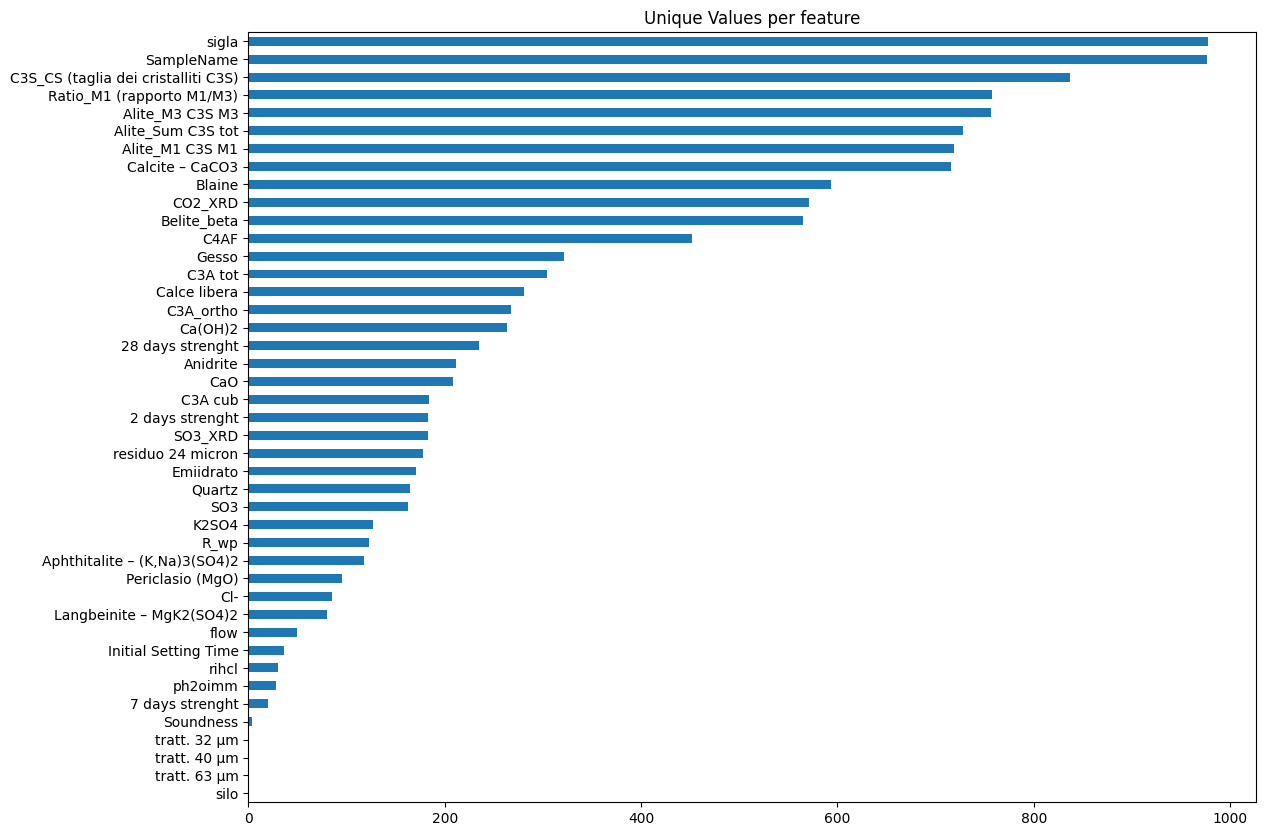

<IPython.core.display.Javascript object>

In [48]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CEM A expedition control'),
  Text(1, 0, 'CEM B  expedition control'),
  Text(2, 0, 'CEM C  expedition control'),
  Text(3, 0, 'LOI'),
  Text(4, 0, 'data')])

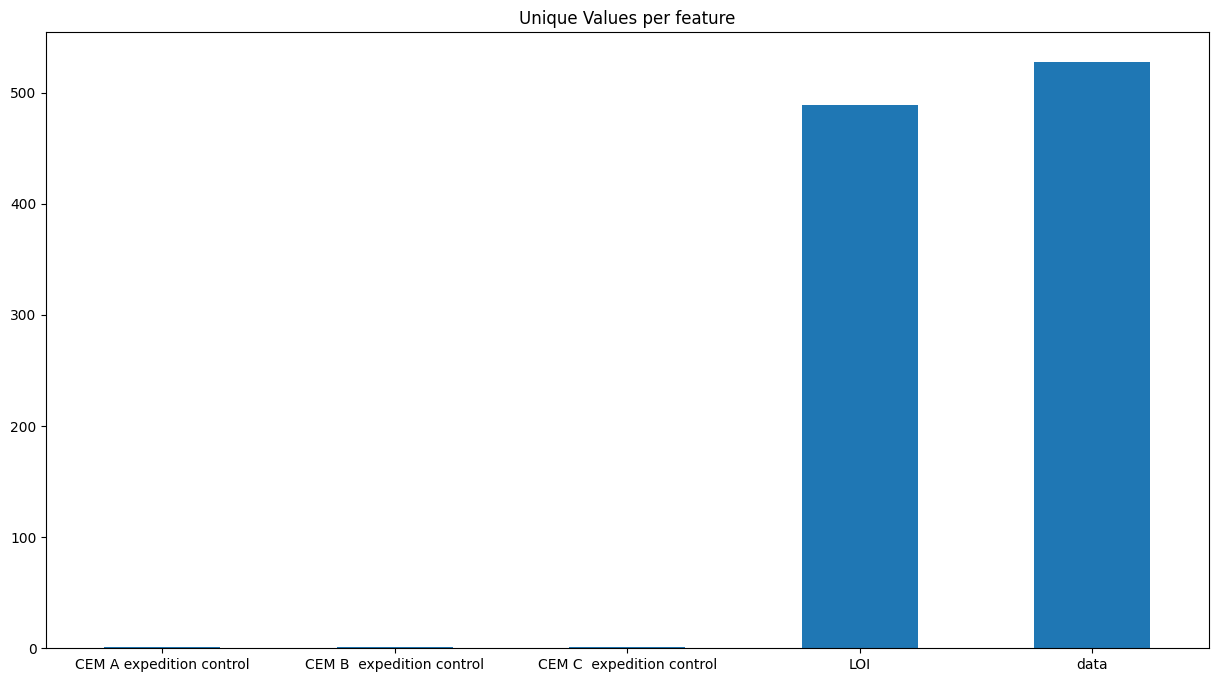

<IPython.core.display.Javascript object>

In [49]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Count of quantity of missing values')

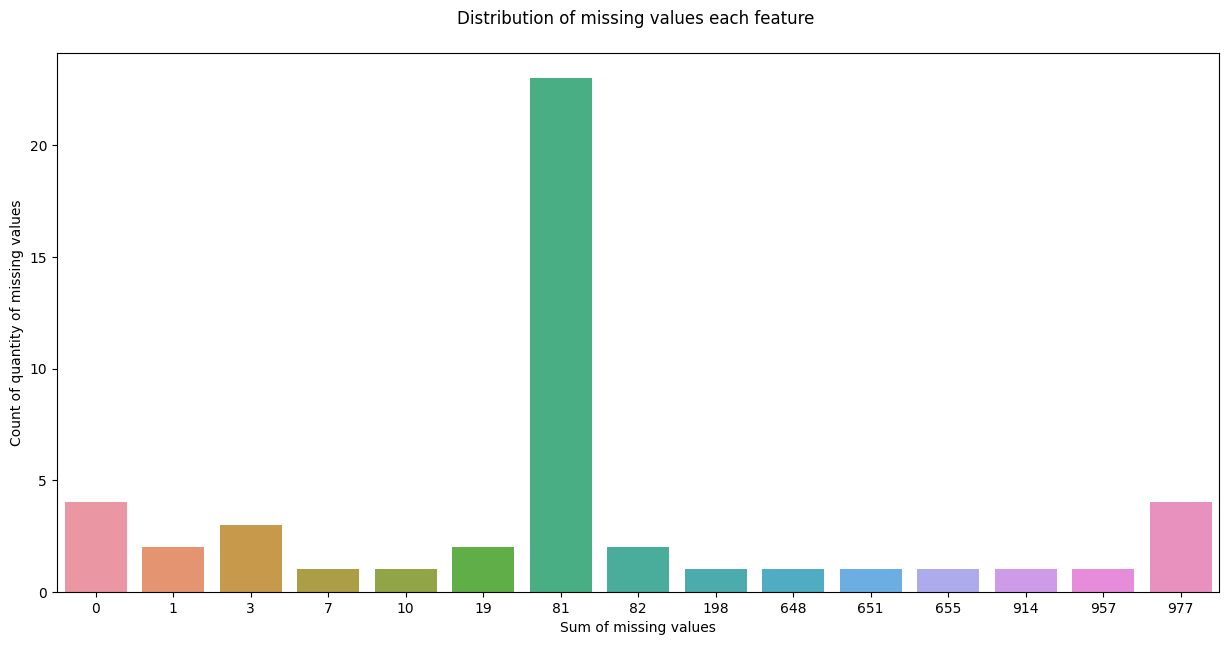

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df.isna().sum(), x=df.isna().sum().index)
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 48 artists>

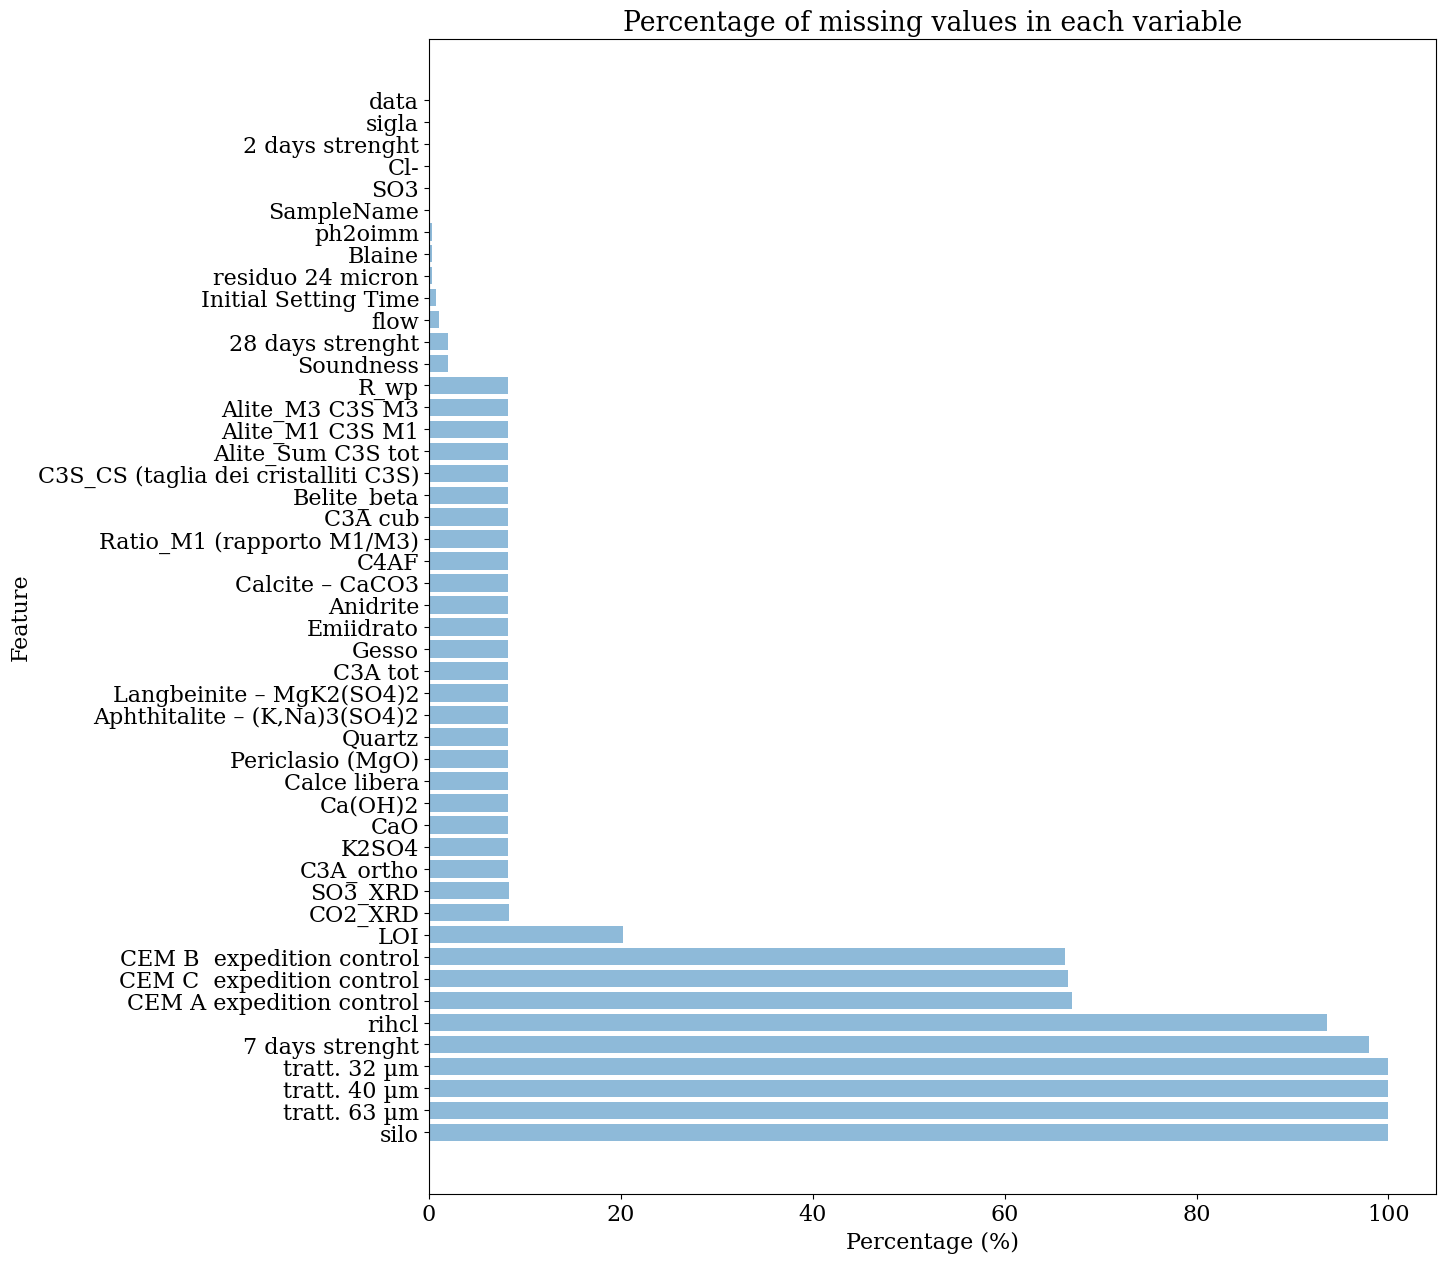

<IPython.core.display.Javascript object>

In [51]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [52]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 48 artists>

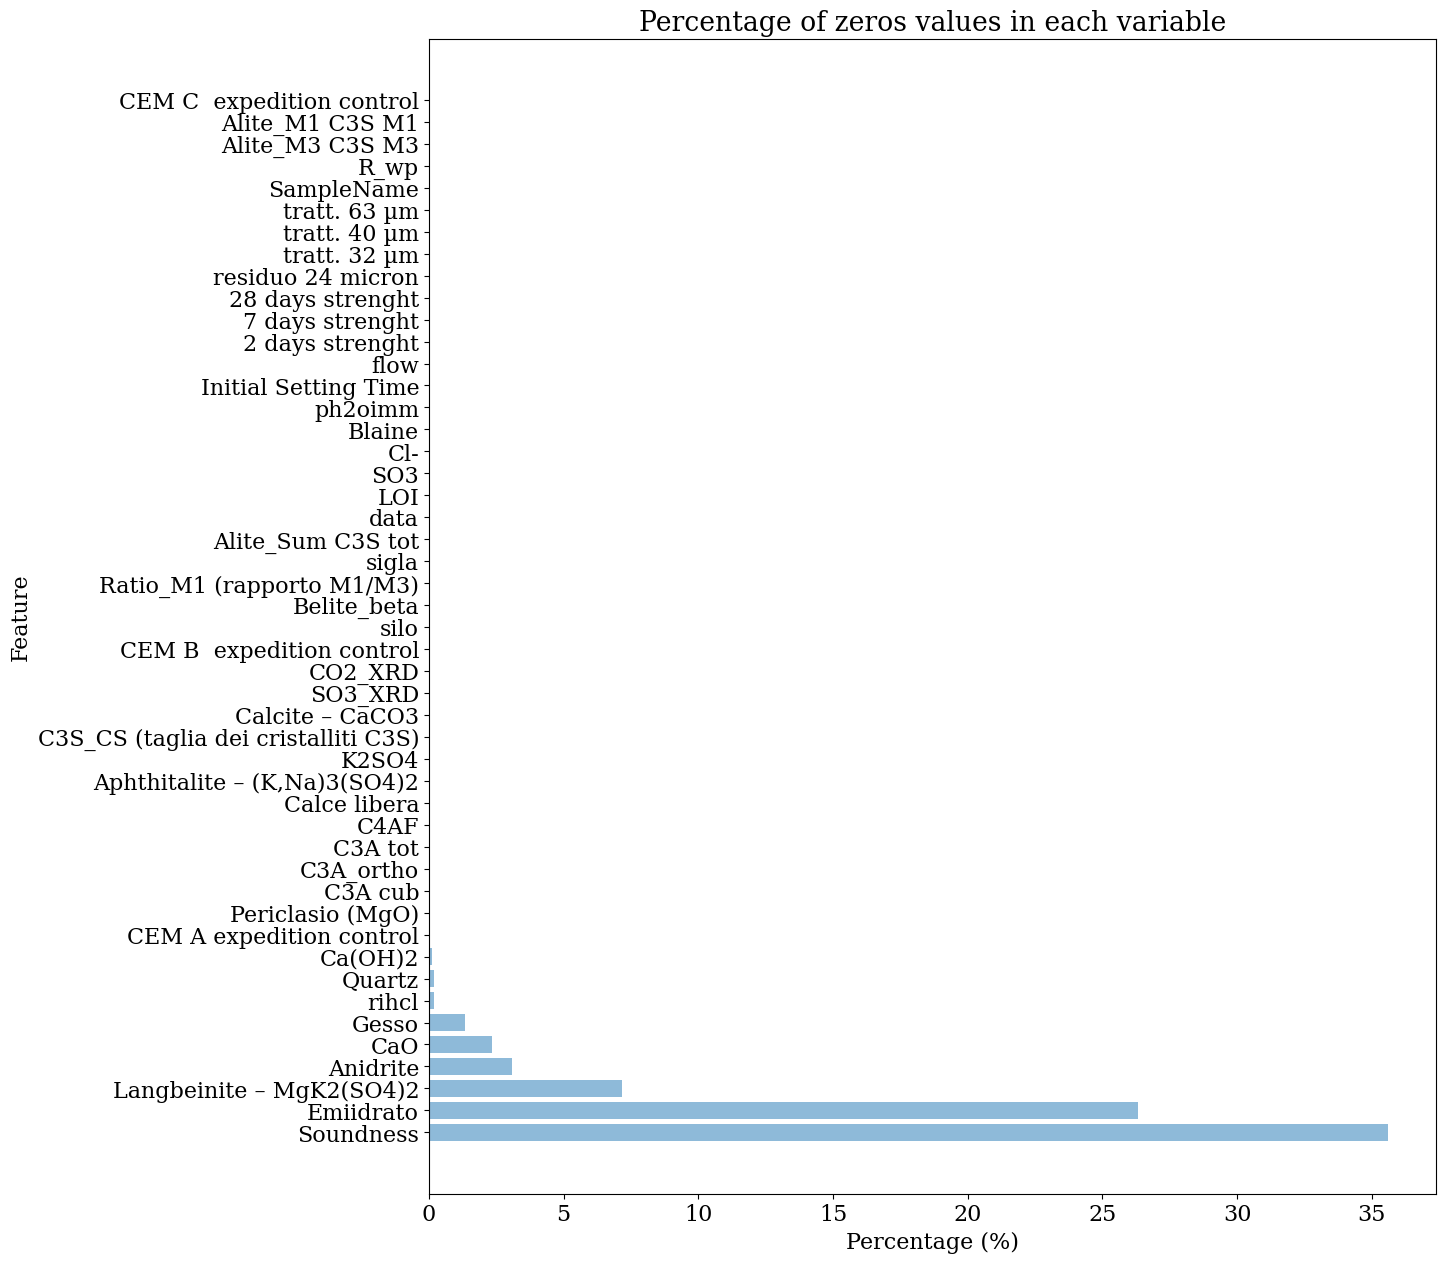

<IPython.core.display.Javascript object>

In [53]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [54]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

In [55]:
n_duplicates = df.drop(["data"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

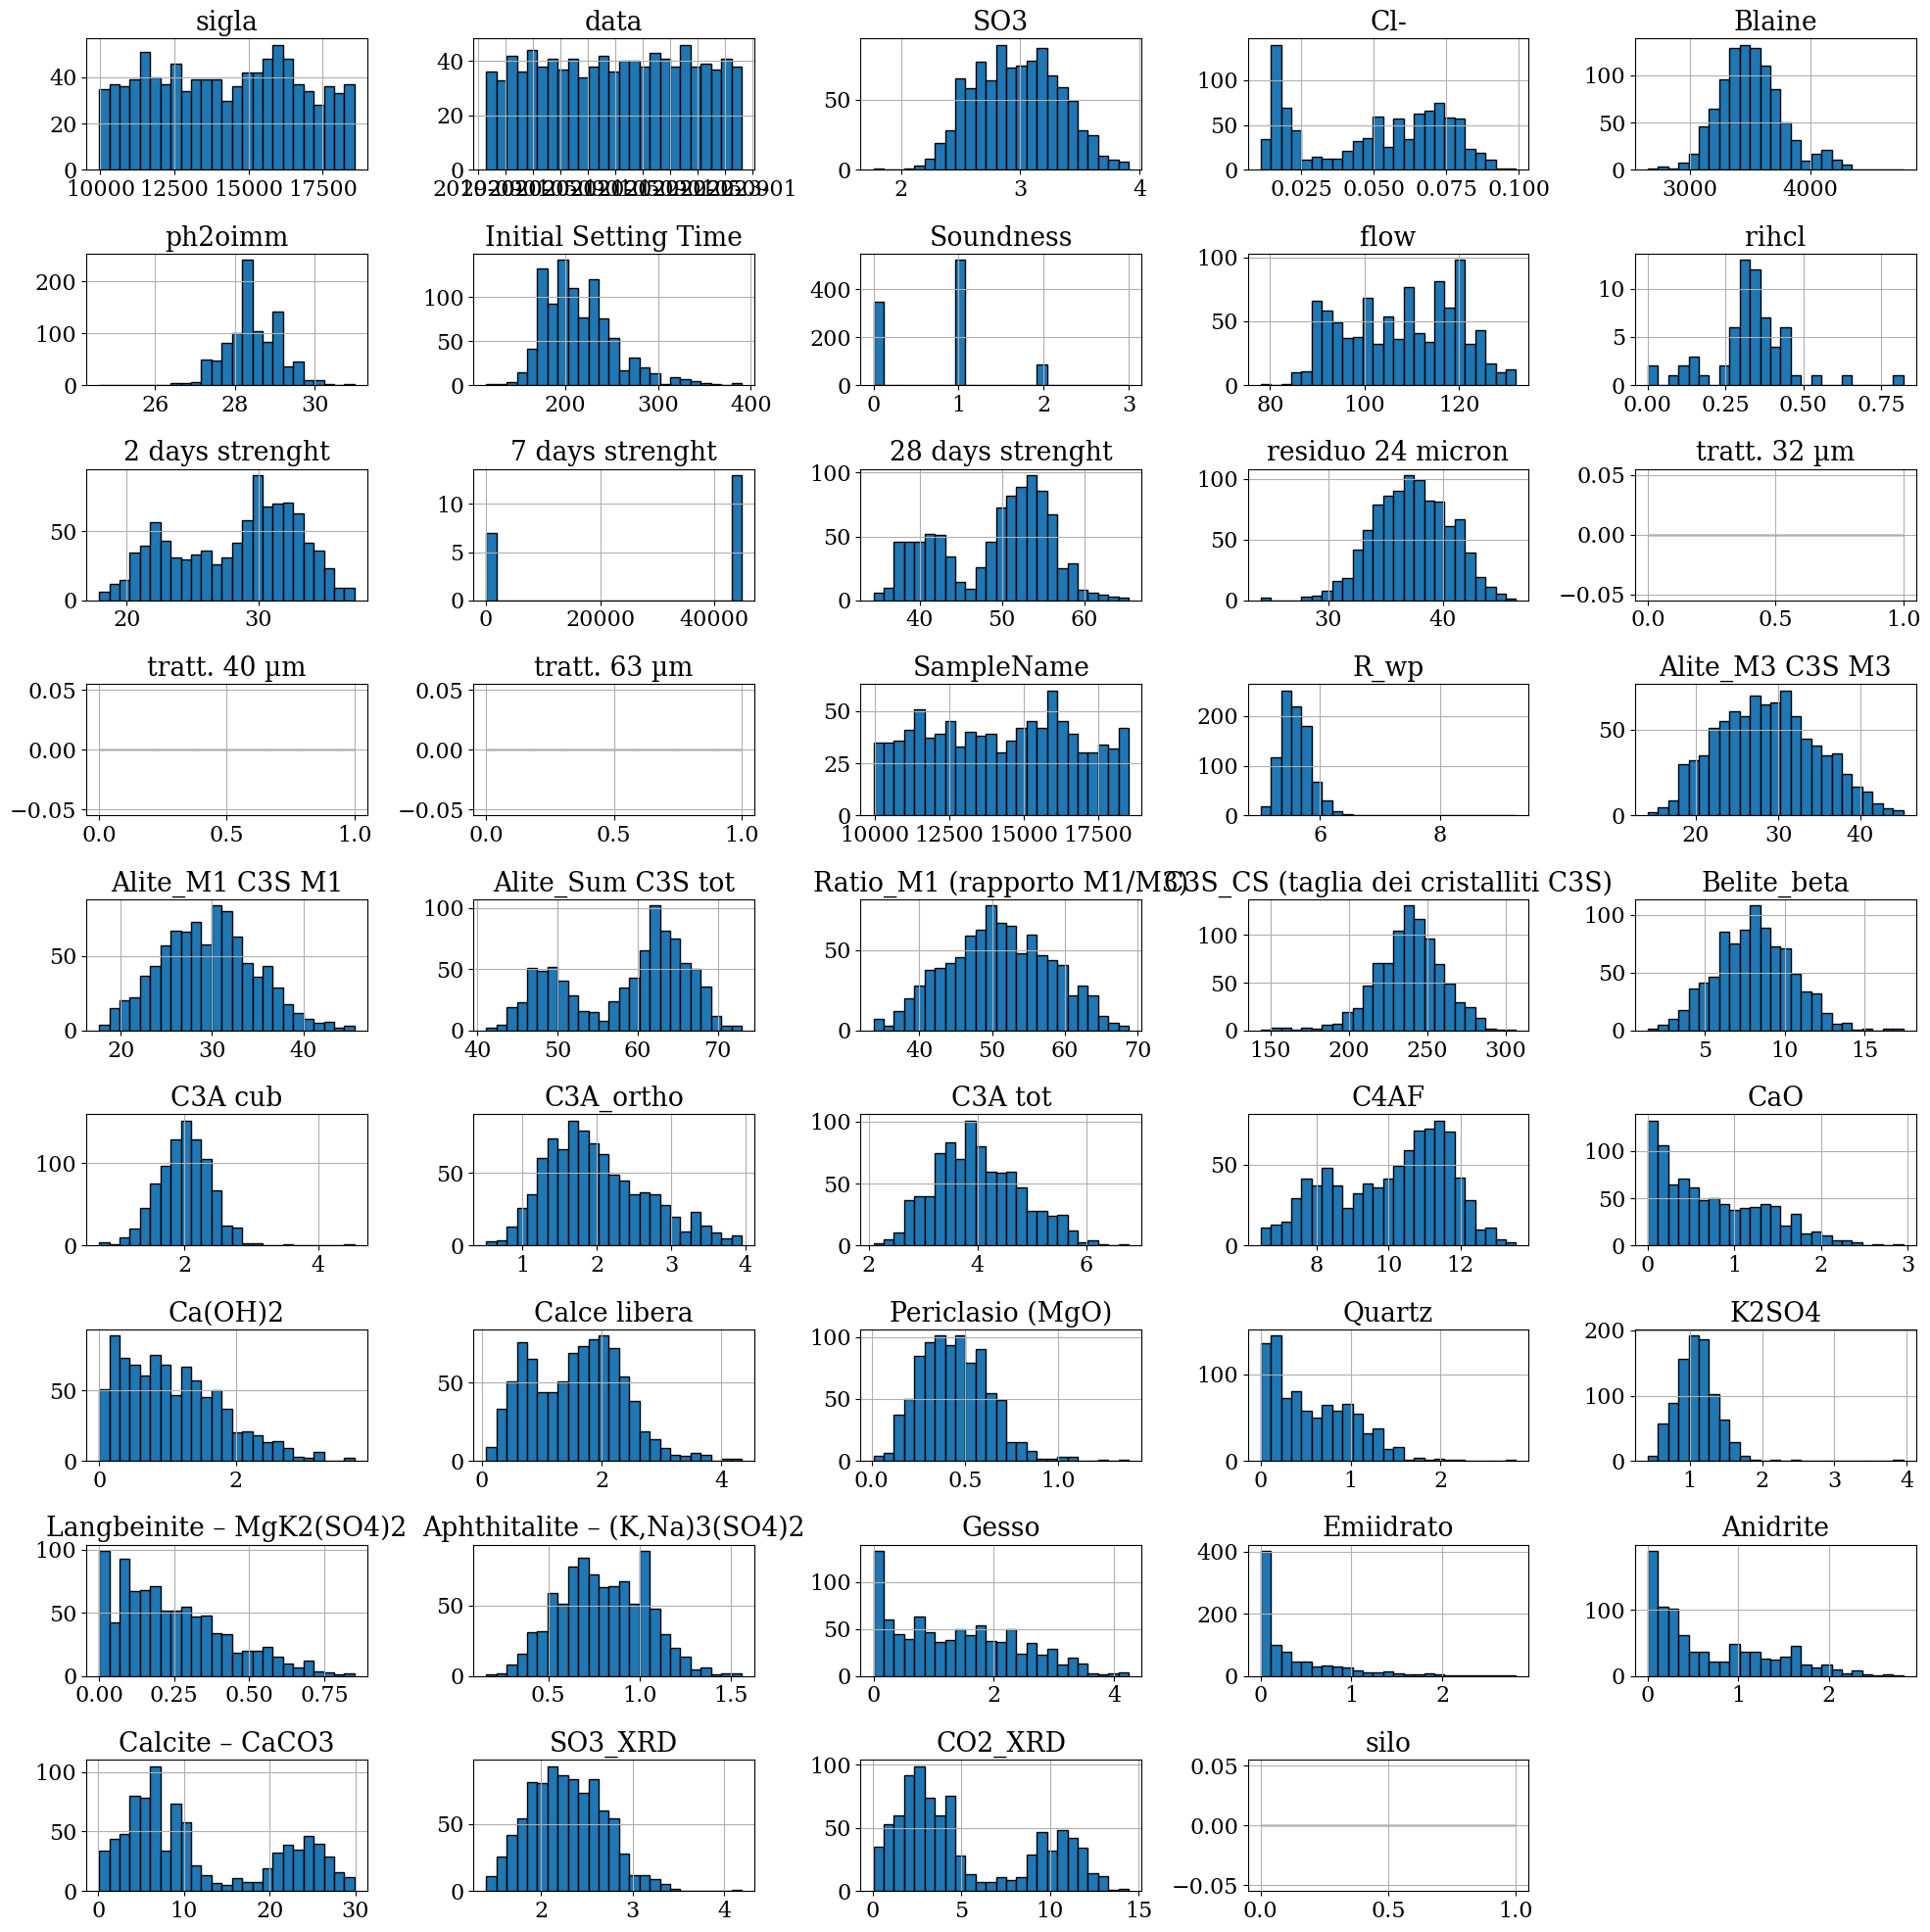

<IPython.core.display.Javascript object>

In [56]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

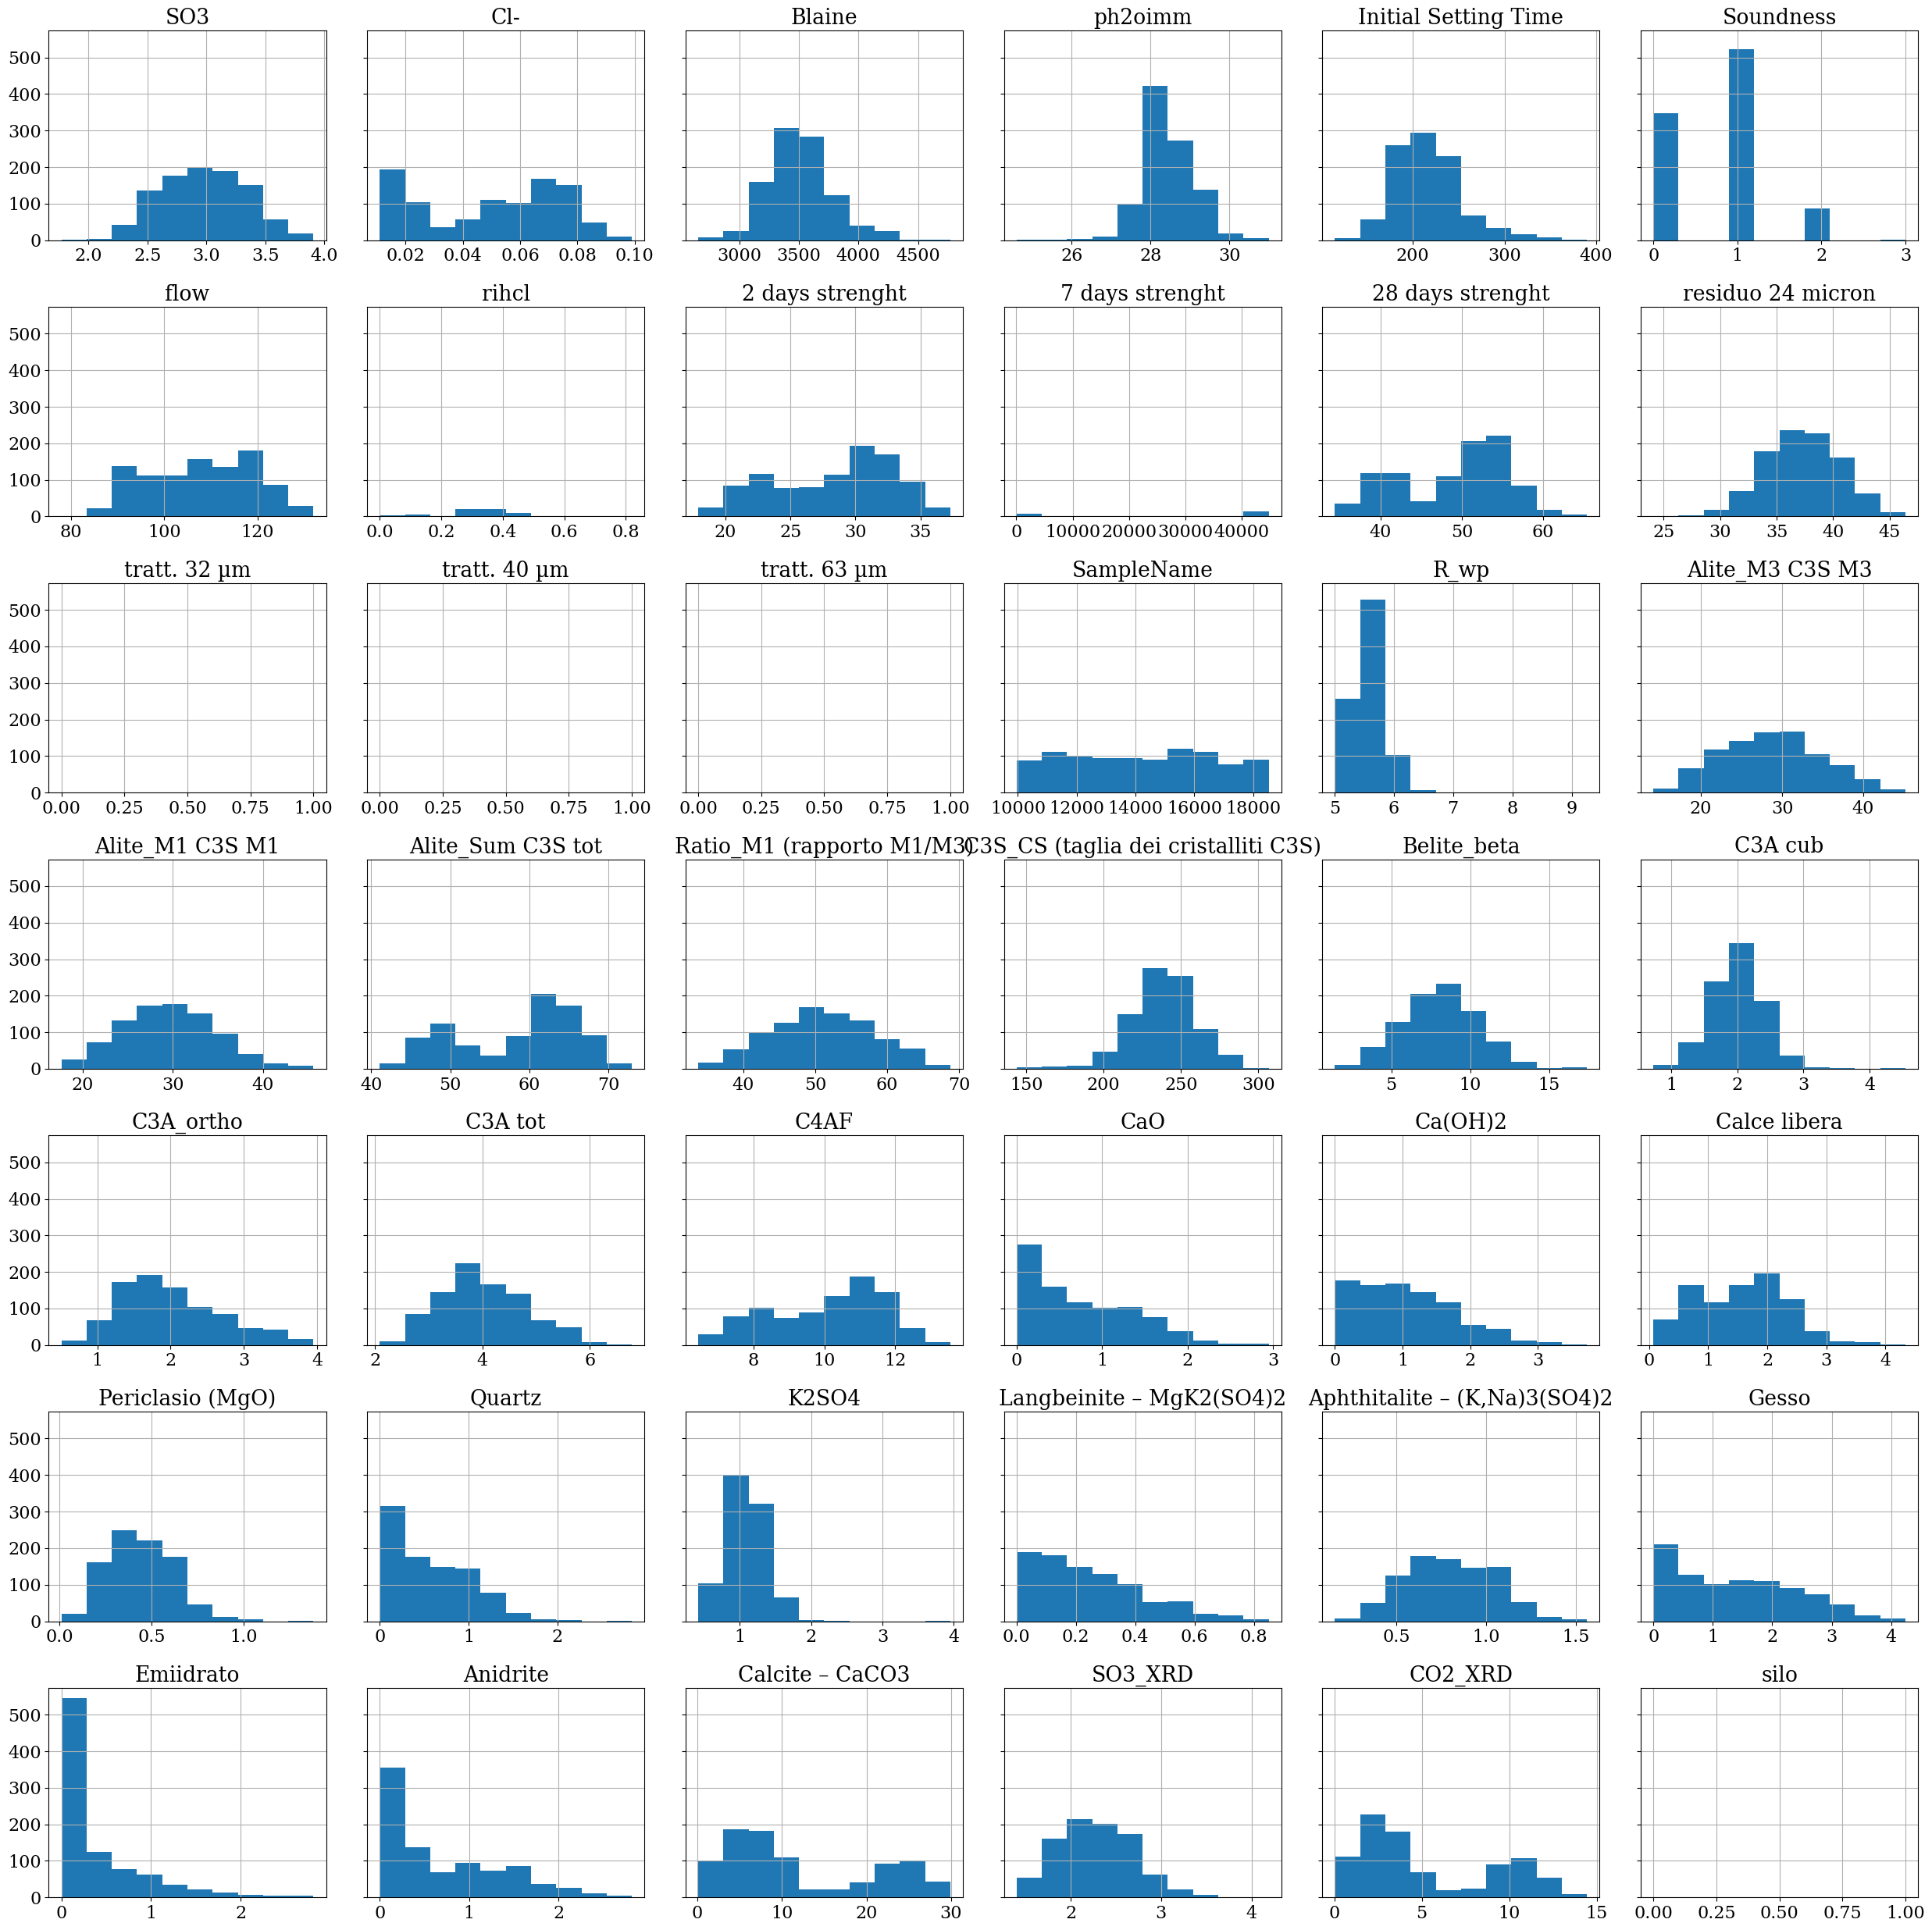

<IPython.core.display.Javascript object>

In [57]:
df.select_dtypes(include="float64").hist(figsize=(25, 25), sharey=True)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

/tmp/ipykernel_39474/3539967212.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_39474/3539967212.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

/tmp/ipykernel_39474/3539967212.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_39474/3539967212.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_39474/3539967212.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_39474/3539967212.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/tmp/ipykernel_39474/3539967212.py:7: 

/tmp/ipykernel_39474/3539967212.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_39474/3539967212.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

/tmp/ipykernel_39474/3539967212.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_39474/3539967212.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before oper

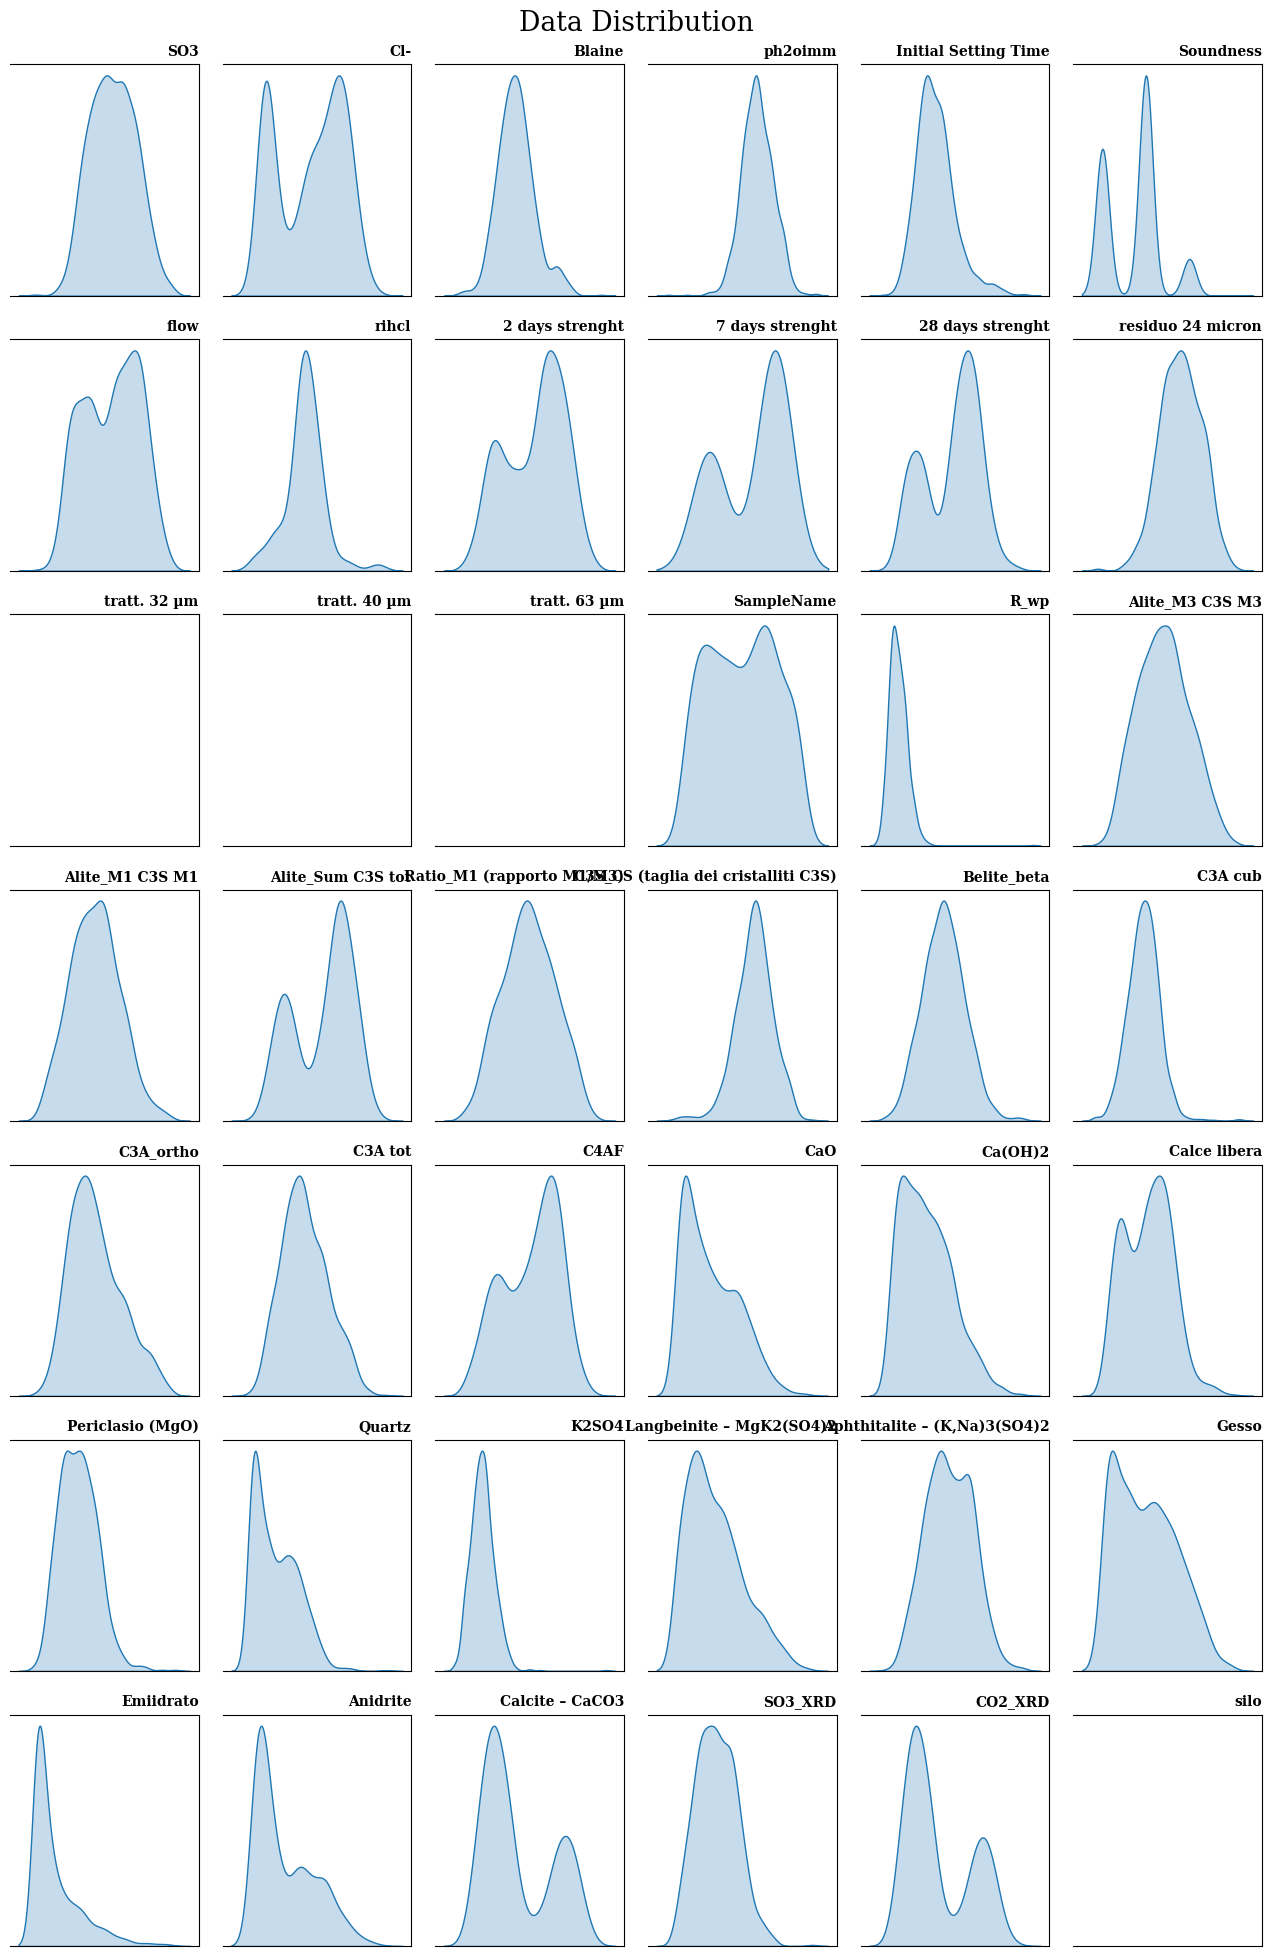

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(7, 6, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

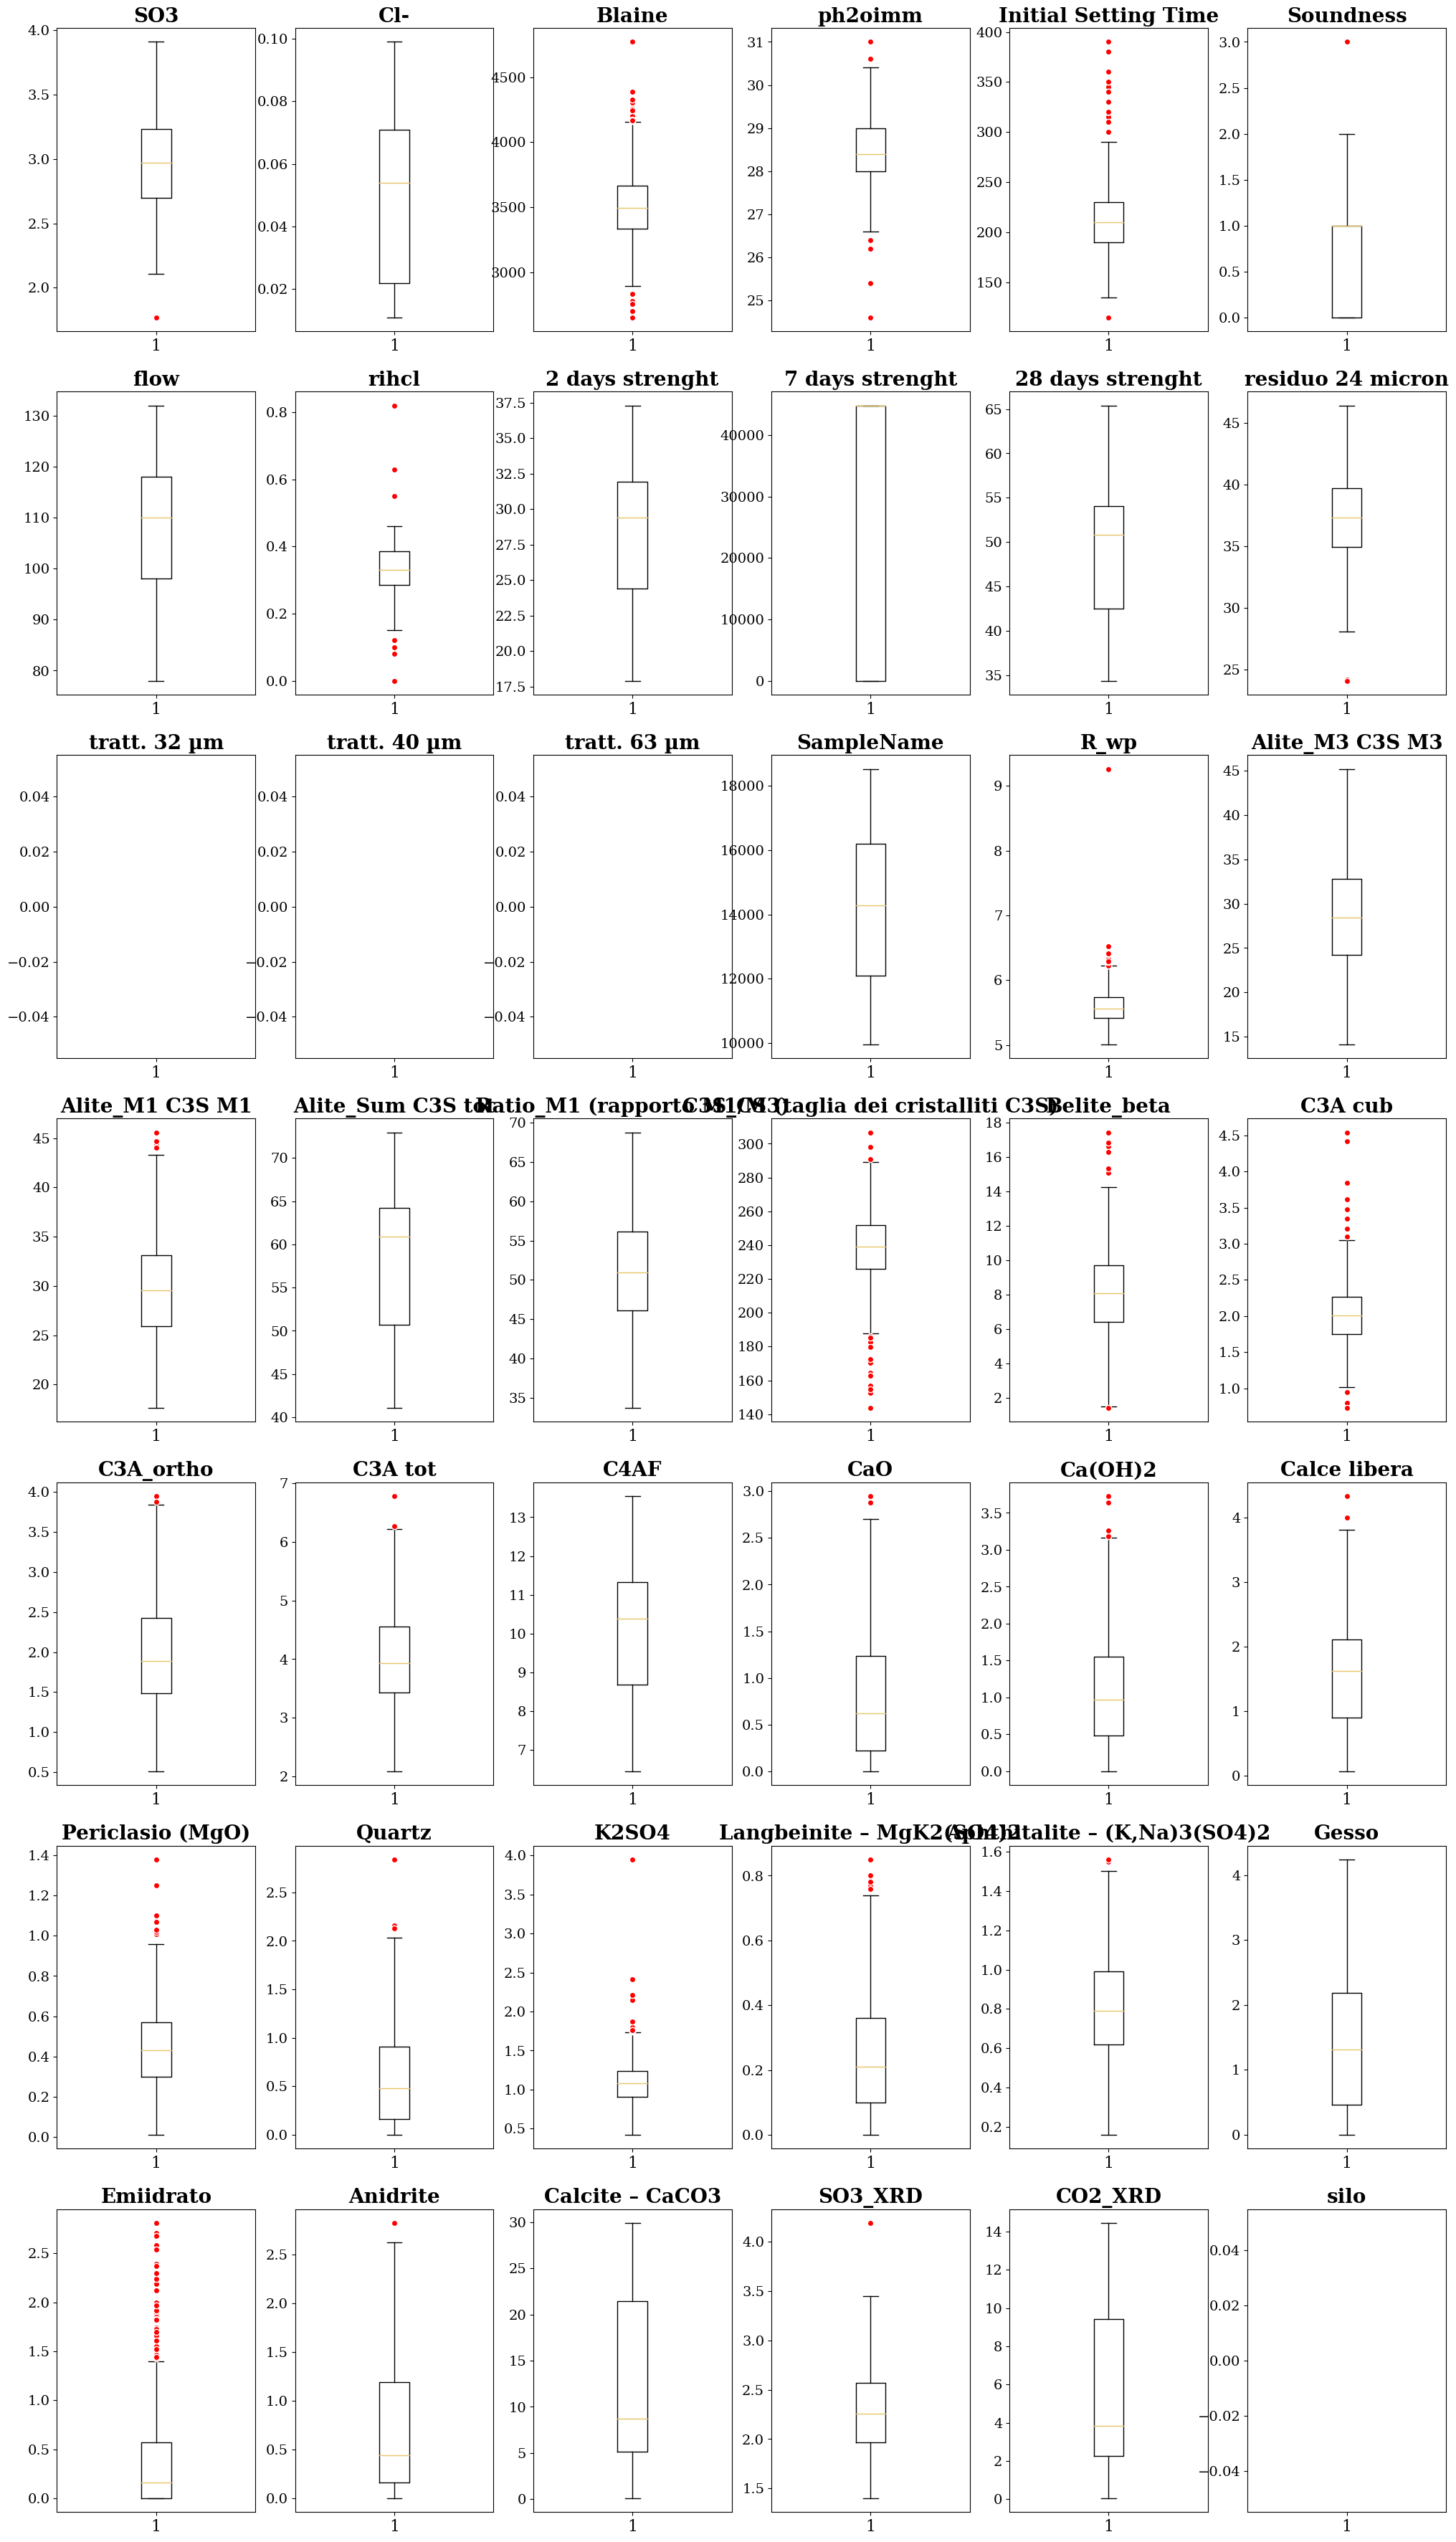

<IPython.core.display.Javascript object>

In [59]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(7, 6, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

<Axes: >

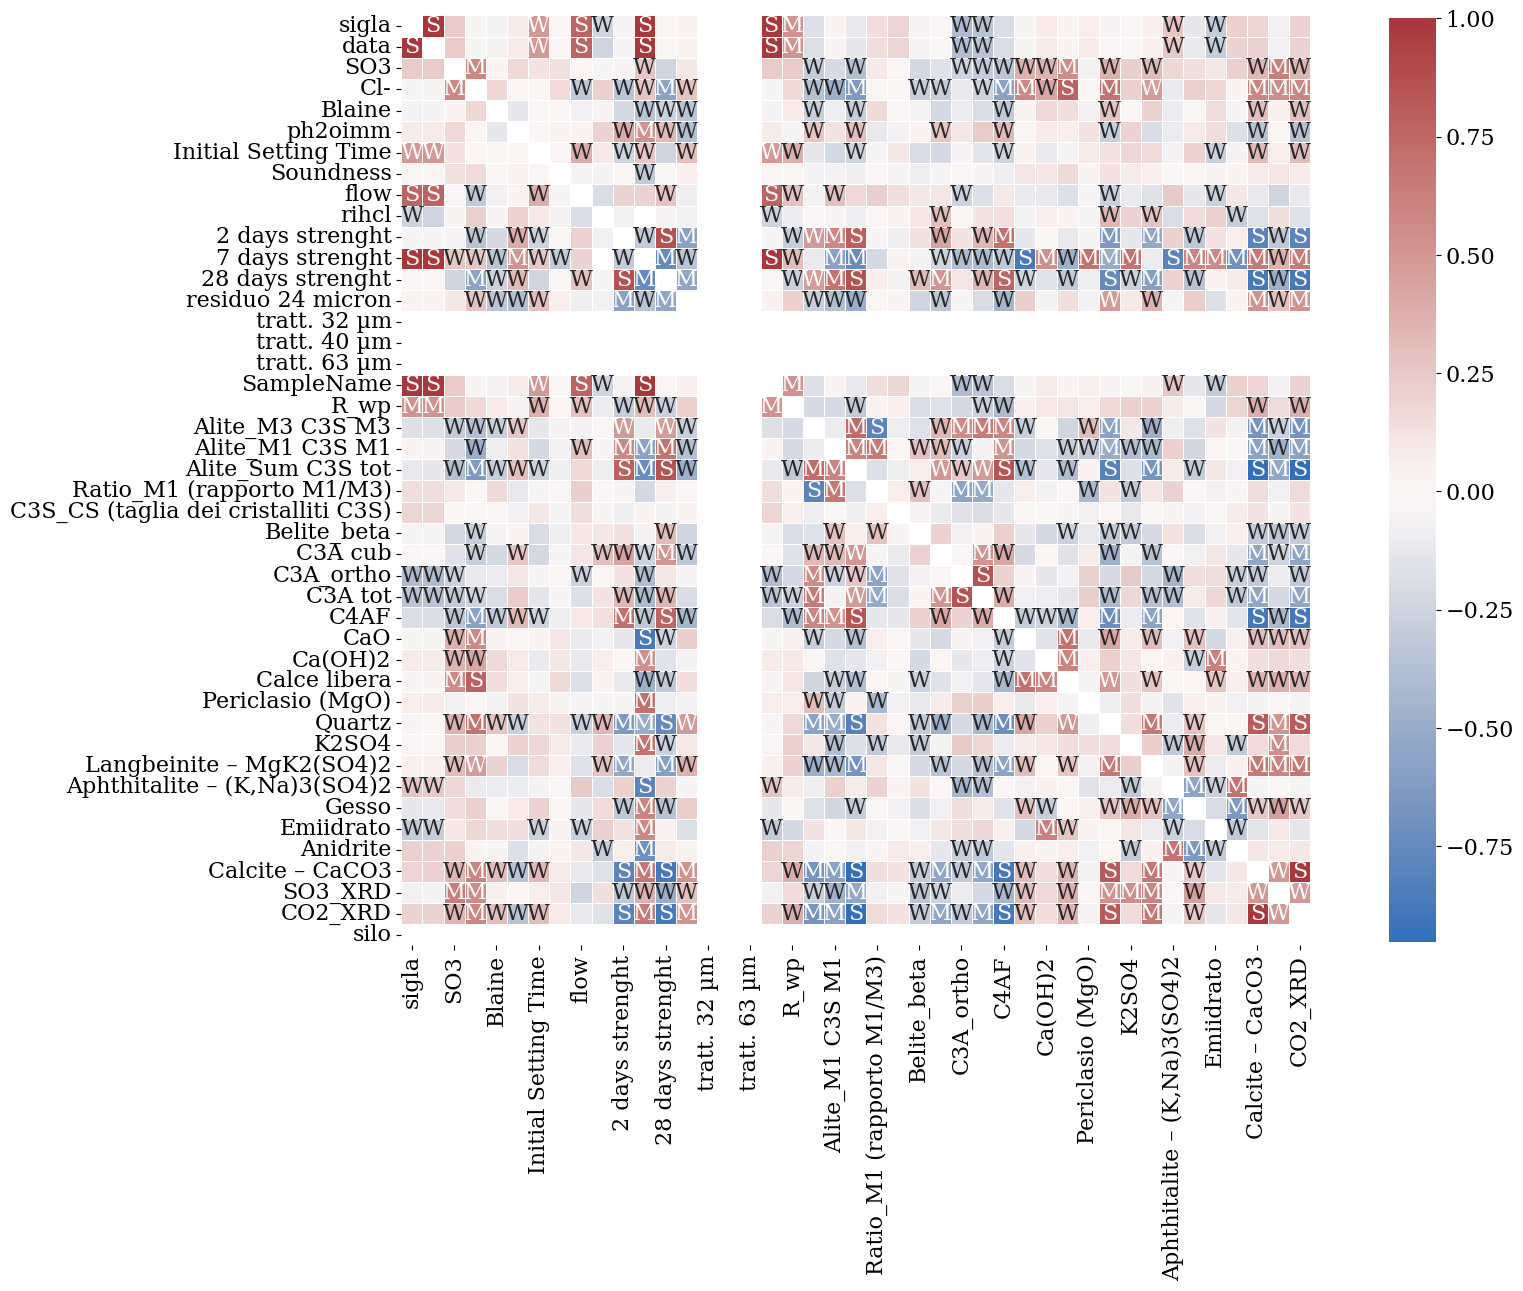

<IPython.core.display.Javascript object>

In [60]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

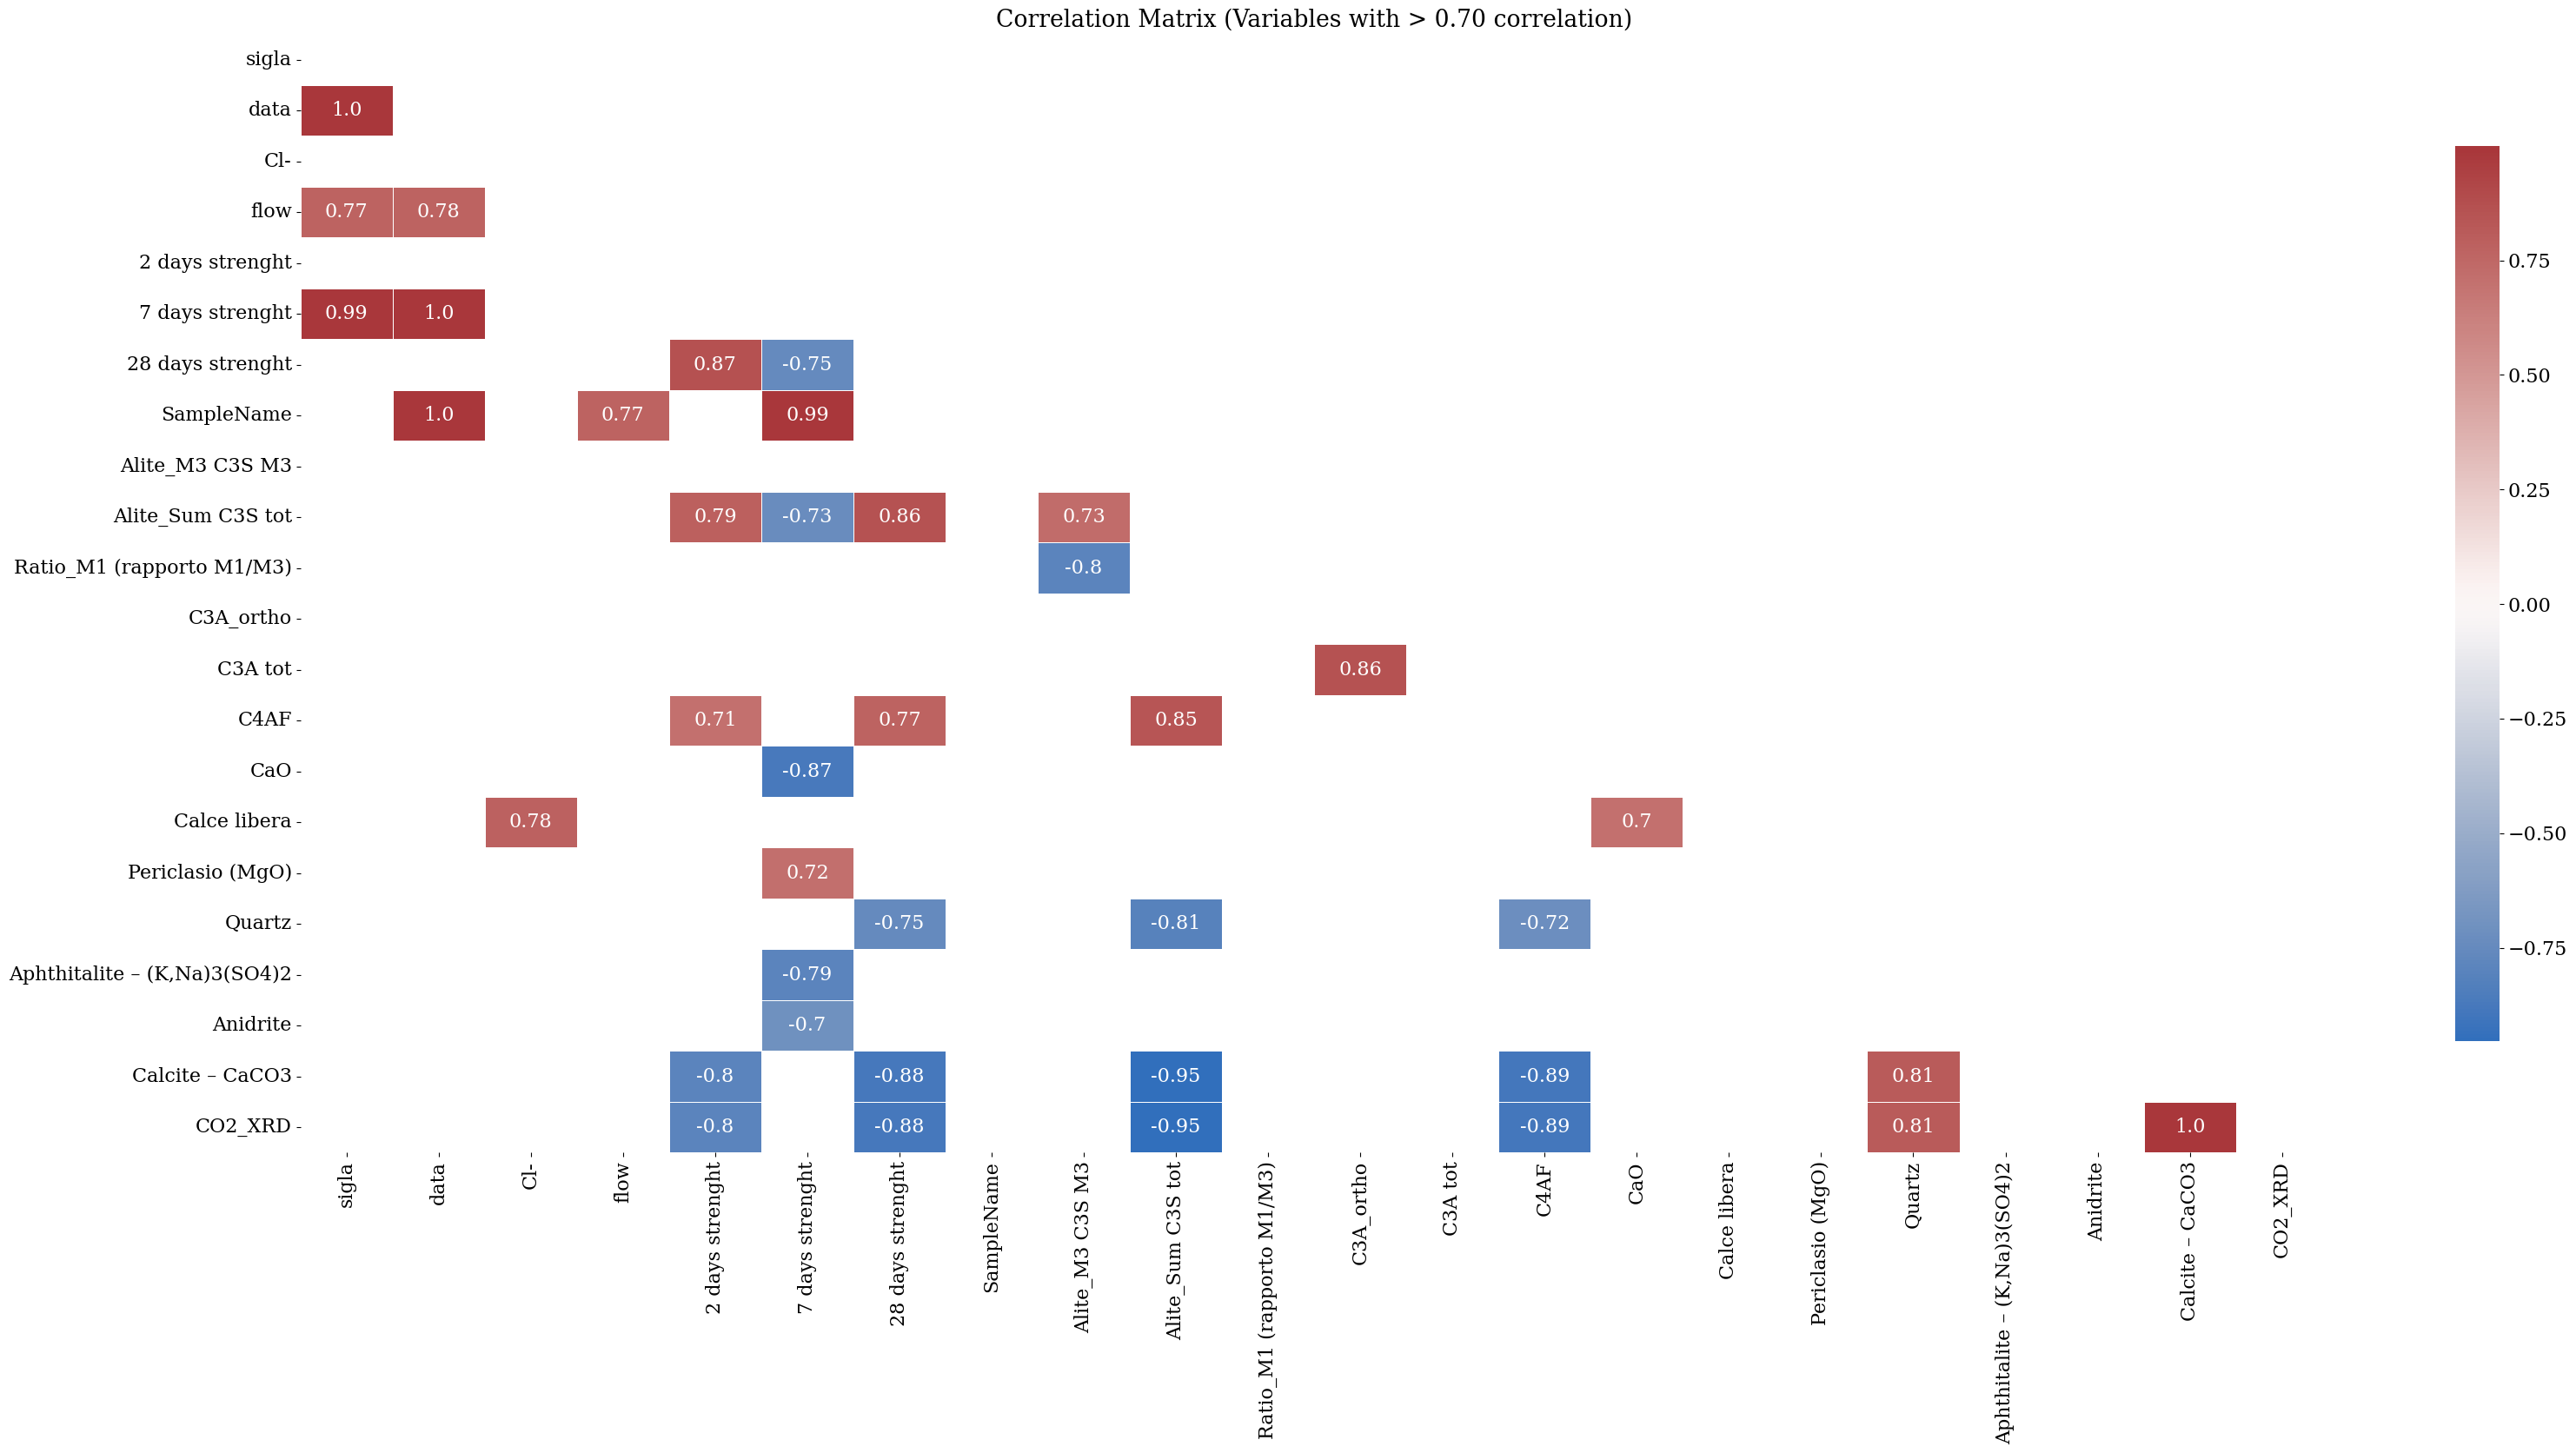

<IPython.core.display.Javascript object>

In [61]:
df_corr = df.select_dtypes(exclude=object).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [62]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                      1.000000
data               SampleName                      0.999619
sigla              data                            0.999619
Calcite – CaCO3    CO2_XRD                         0.999108
data               7 days strenght                 0.996663
sigla              7 days strenght                 0.994258
7 days strenght    SampleName                      0.994258
Alite_Sum C3S tot  Calcite – CaCO3                 0.953236
                   CO2_XRD                         0.952439
C4AF               Calcite – CaCO3                 0.890210
                   CO2_XRD                         0.889261
28 days strenght   Calcite – CaCO3                 0.878603
                   CO2_XRD                         0.877922
7 days strenght    CaO                             0.873204
2 days strenght    28 days strenght                0.866884
28 days strenght   Alite_Sum C3S tot               0.858240
C3A_ortho          C3A tot              

<IPython.core.display.Javascript object>

In [63]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

28 days strenght      Calcite – CaCO3                        0.878603
                      CO2_XRD                                0.877922
2 days strenght       28 days strenght                       0.866884
28 days strenght      Alite_Sum C3S tot                      0.858240
                      C4AF                                   0.771064
                      Quartz                                 0.750986
7 days strenght       28 days strenght                       0.749089
28 days strenght      Alite_M1 C3S M1                        0.693685
                      Langbeinite – MgK2(SO4)2               0.606036
Cl-                   28 days strenght                       0.579222
28 days strenght      residuo 24 micron                      0.545876
                      C3A cub                                0.507746
                      SO3_XRD                                0.498718
                      Alite_M3 C3S M3                        0.472353
                    

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

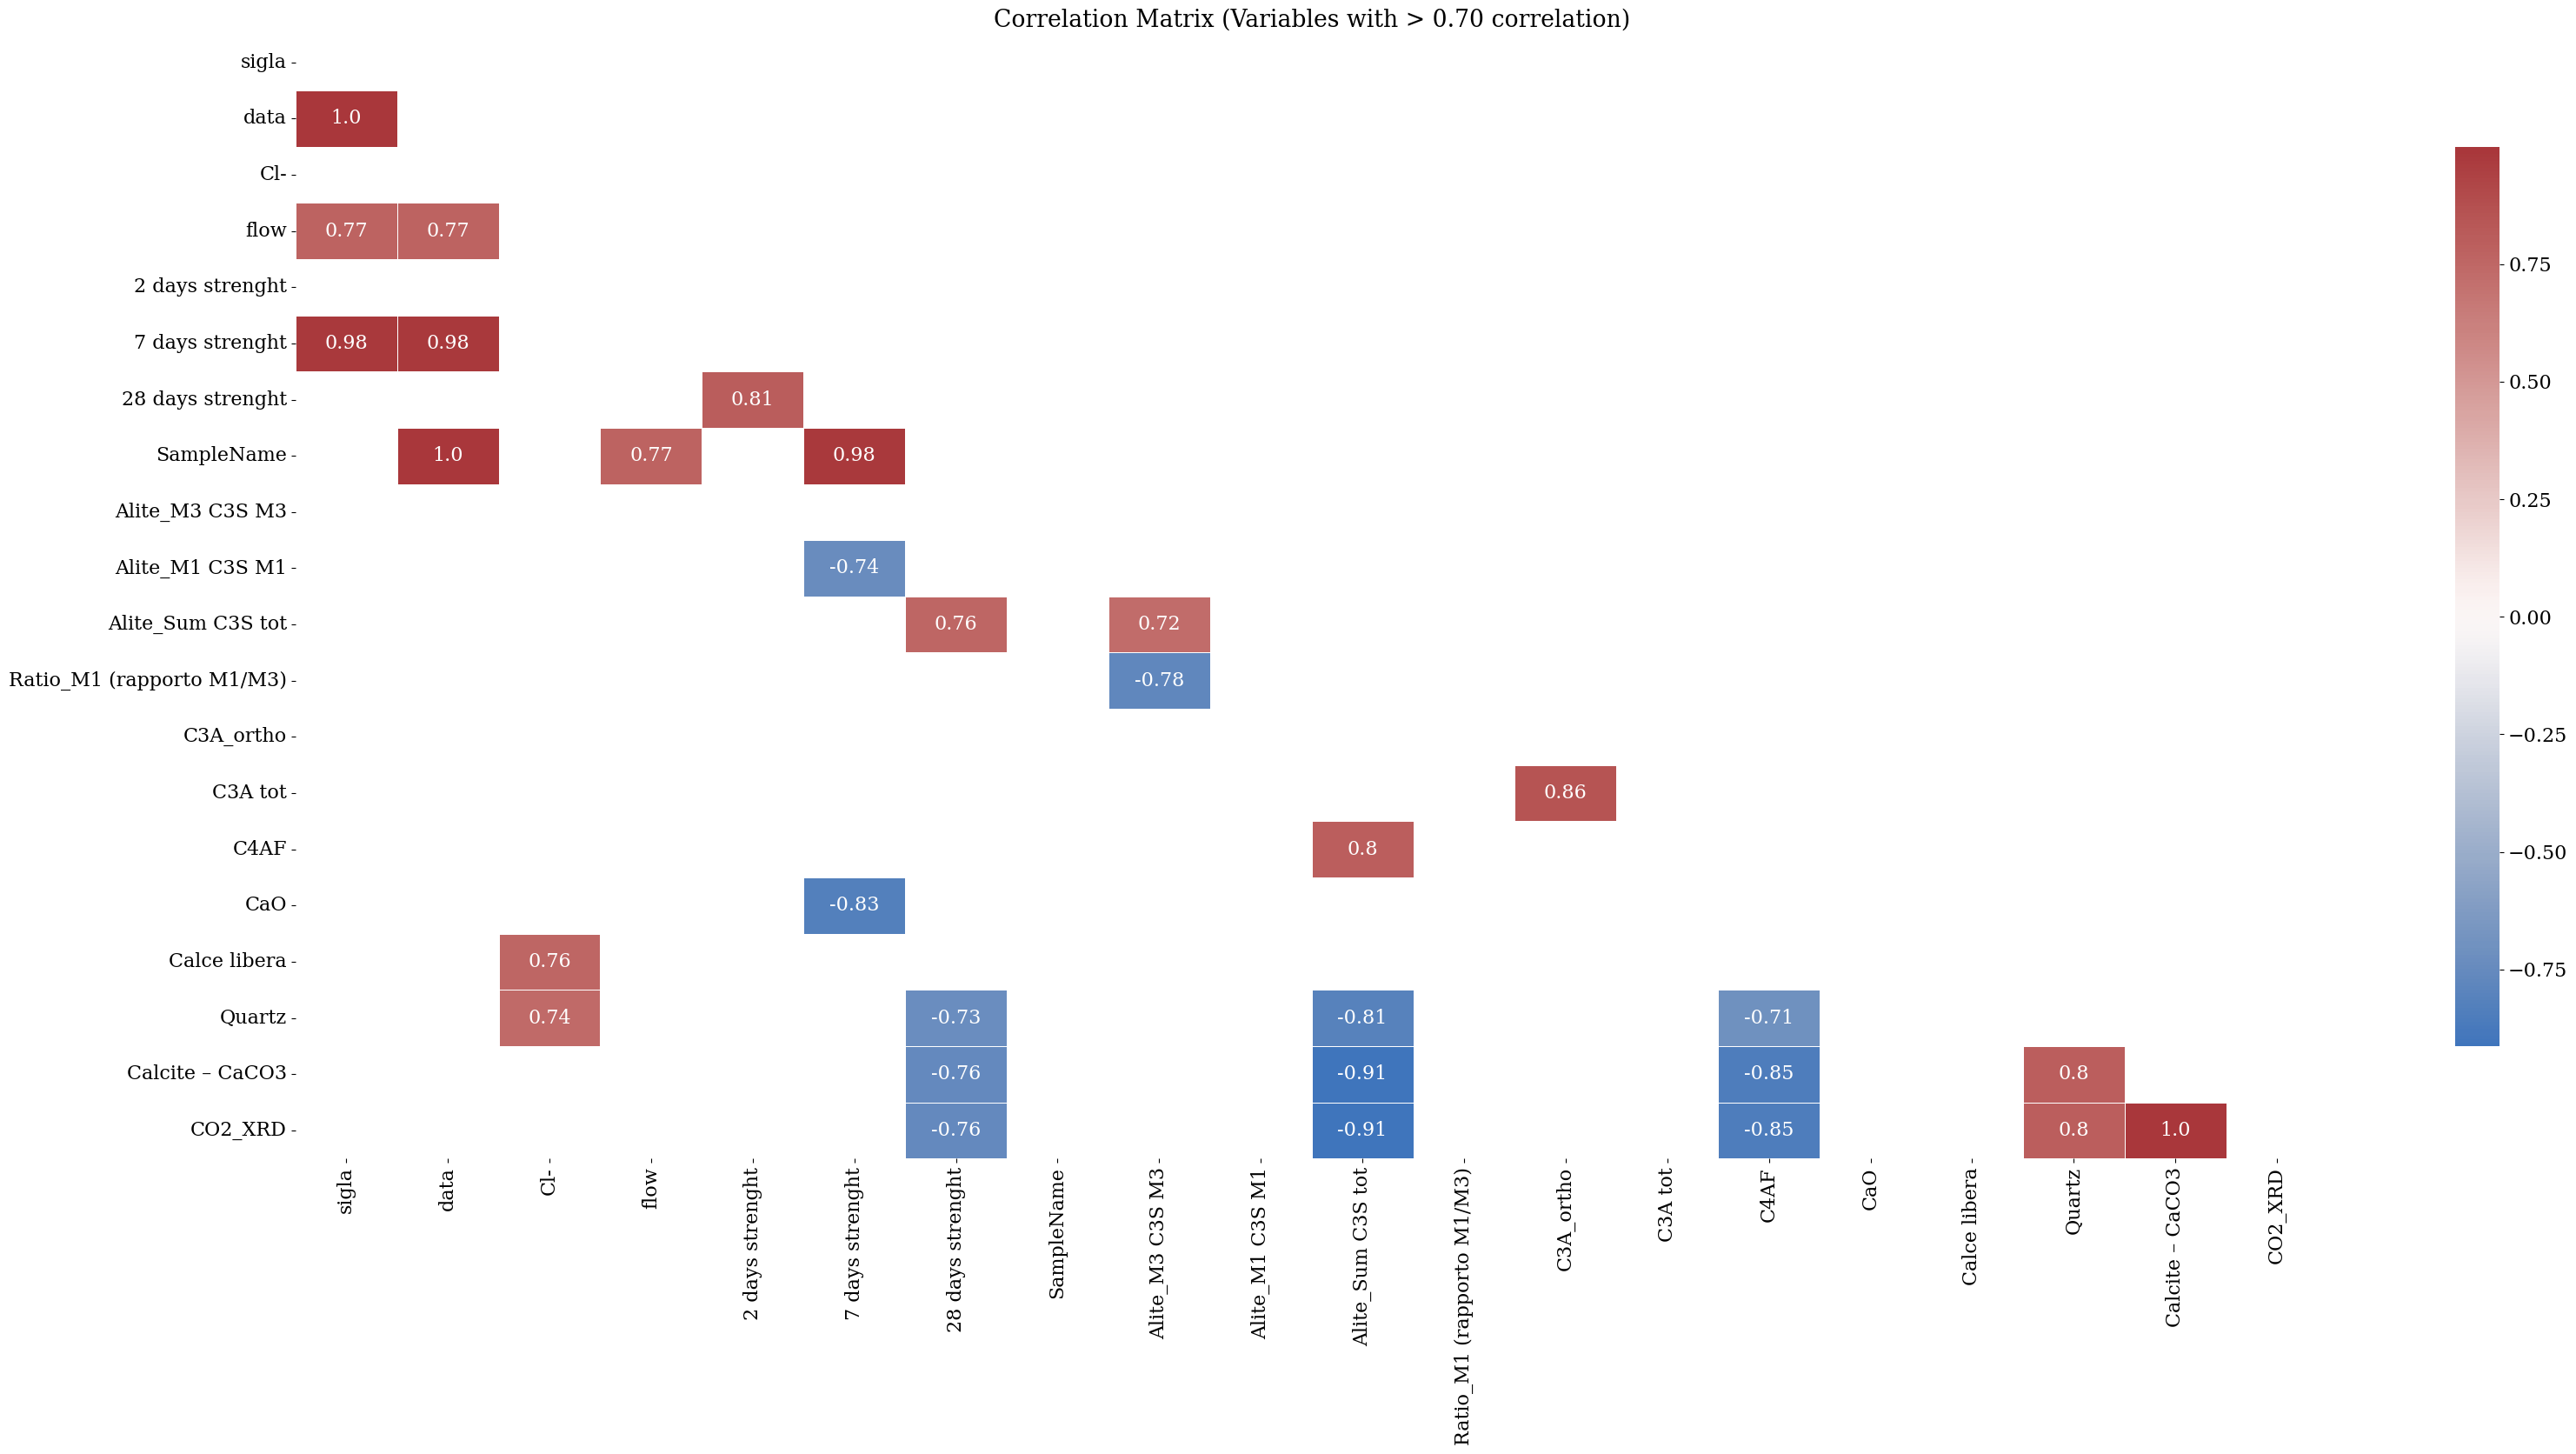

<IPython.core.display.Javascript object>

In [64]:
df_corr = df.select_dtypes(exclude=object).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [65]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="spearman").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName                   1.000000
                   data                         0.999962
data               SampleName                   0.999962
Calcite – CaCO3    CO2_XRD                      0.999712
data               7 days strenght              0.983459
7 days strenght    SampleName                   0.983459
sigla              7 days strenght              0.983459
Alite_Sum C3S tot  Calcite – CaCO3              0.912995
                   CO2_XRD                      0.912838
C3A_ortho          C3A tot                      0.857407
C4AF               Calcite – CaCO3              0.850821
                   CO2_XRD                      0.850292
7 days strenght    CaO                          0.828499
2 days strenght    28 days strenght             0.811234
Alite_Sum C3S tot  Quartz                       0.809954
                   C4AF                         0.796250
Quartz             CO2_XRD                      0.796087
                   Calcite – Ca

<IPython.core.display.Javascript object>

In [66]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.811234
28 days strenght      Calcite – CaCO3                        0.760579
                      CO2_XRD                                0.760028
                      Alite_Sum C3S tot                      0.757962
                      Quartz                                 0.729404
                      C4AF                                   0.689140
                      Alite_M1 C3S M1                        0.679547
Cl-                   28 days strenght                       0.584863
28 days strenght      Langbeinite – MgK2(SO4)2               0.569213
                      residuo 24 micron                      0.516977
                      SO3_XRD                                0.510995
                      C3A cub                                0.478574
                      Alite_M3 C3S M3                        0.434482
                      Gesso                                  0.368296
                    

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

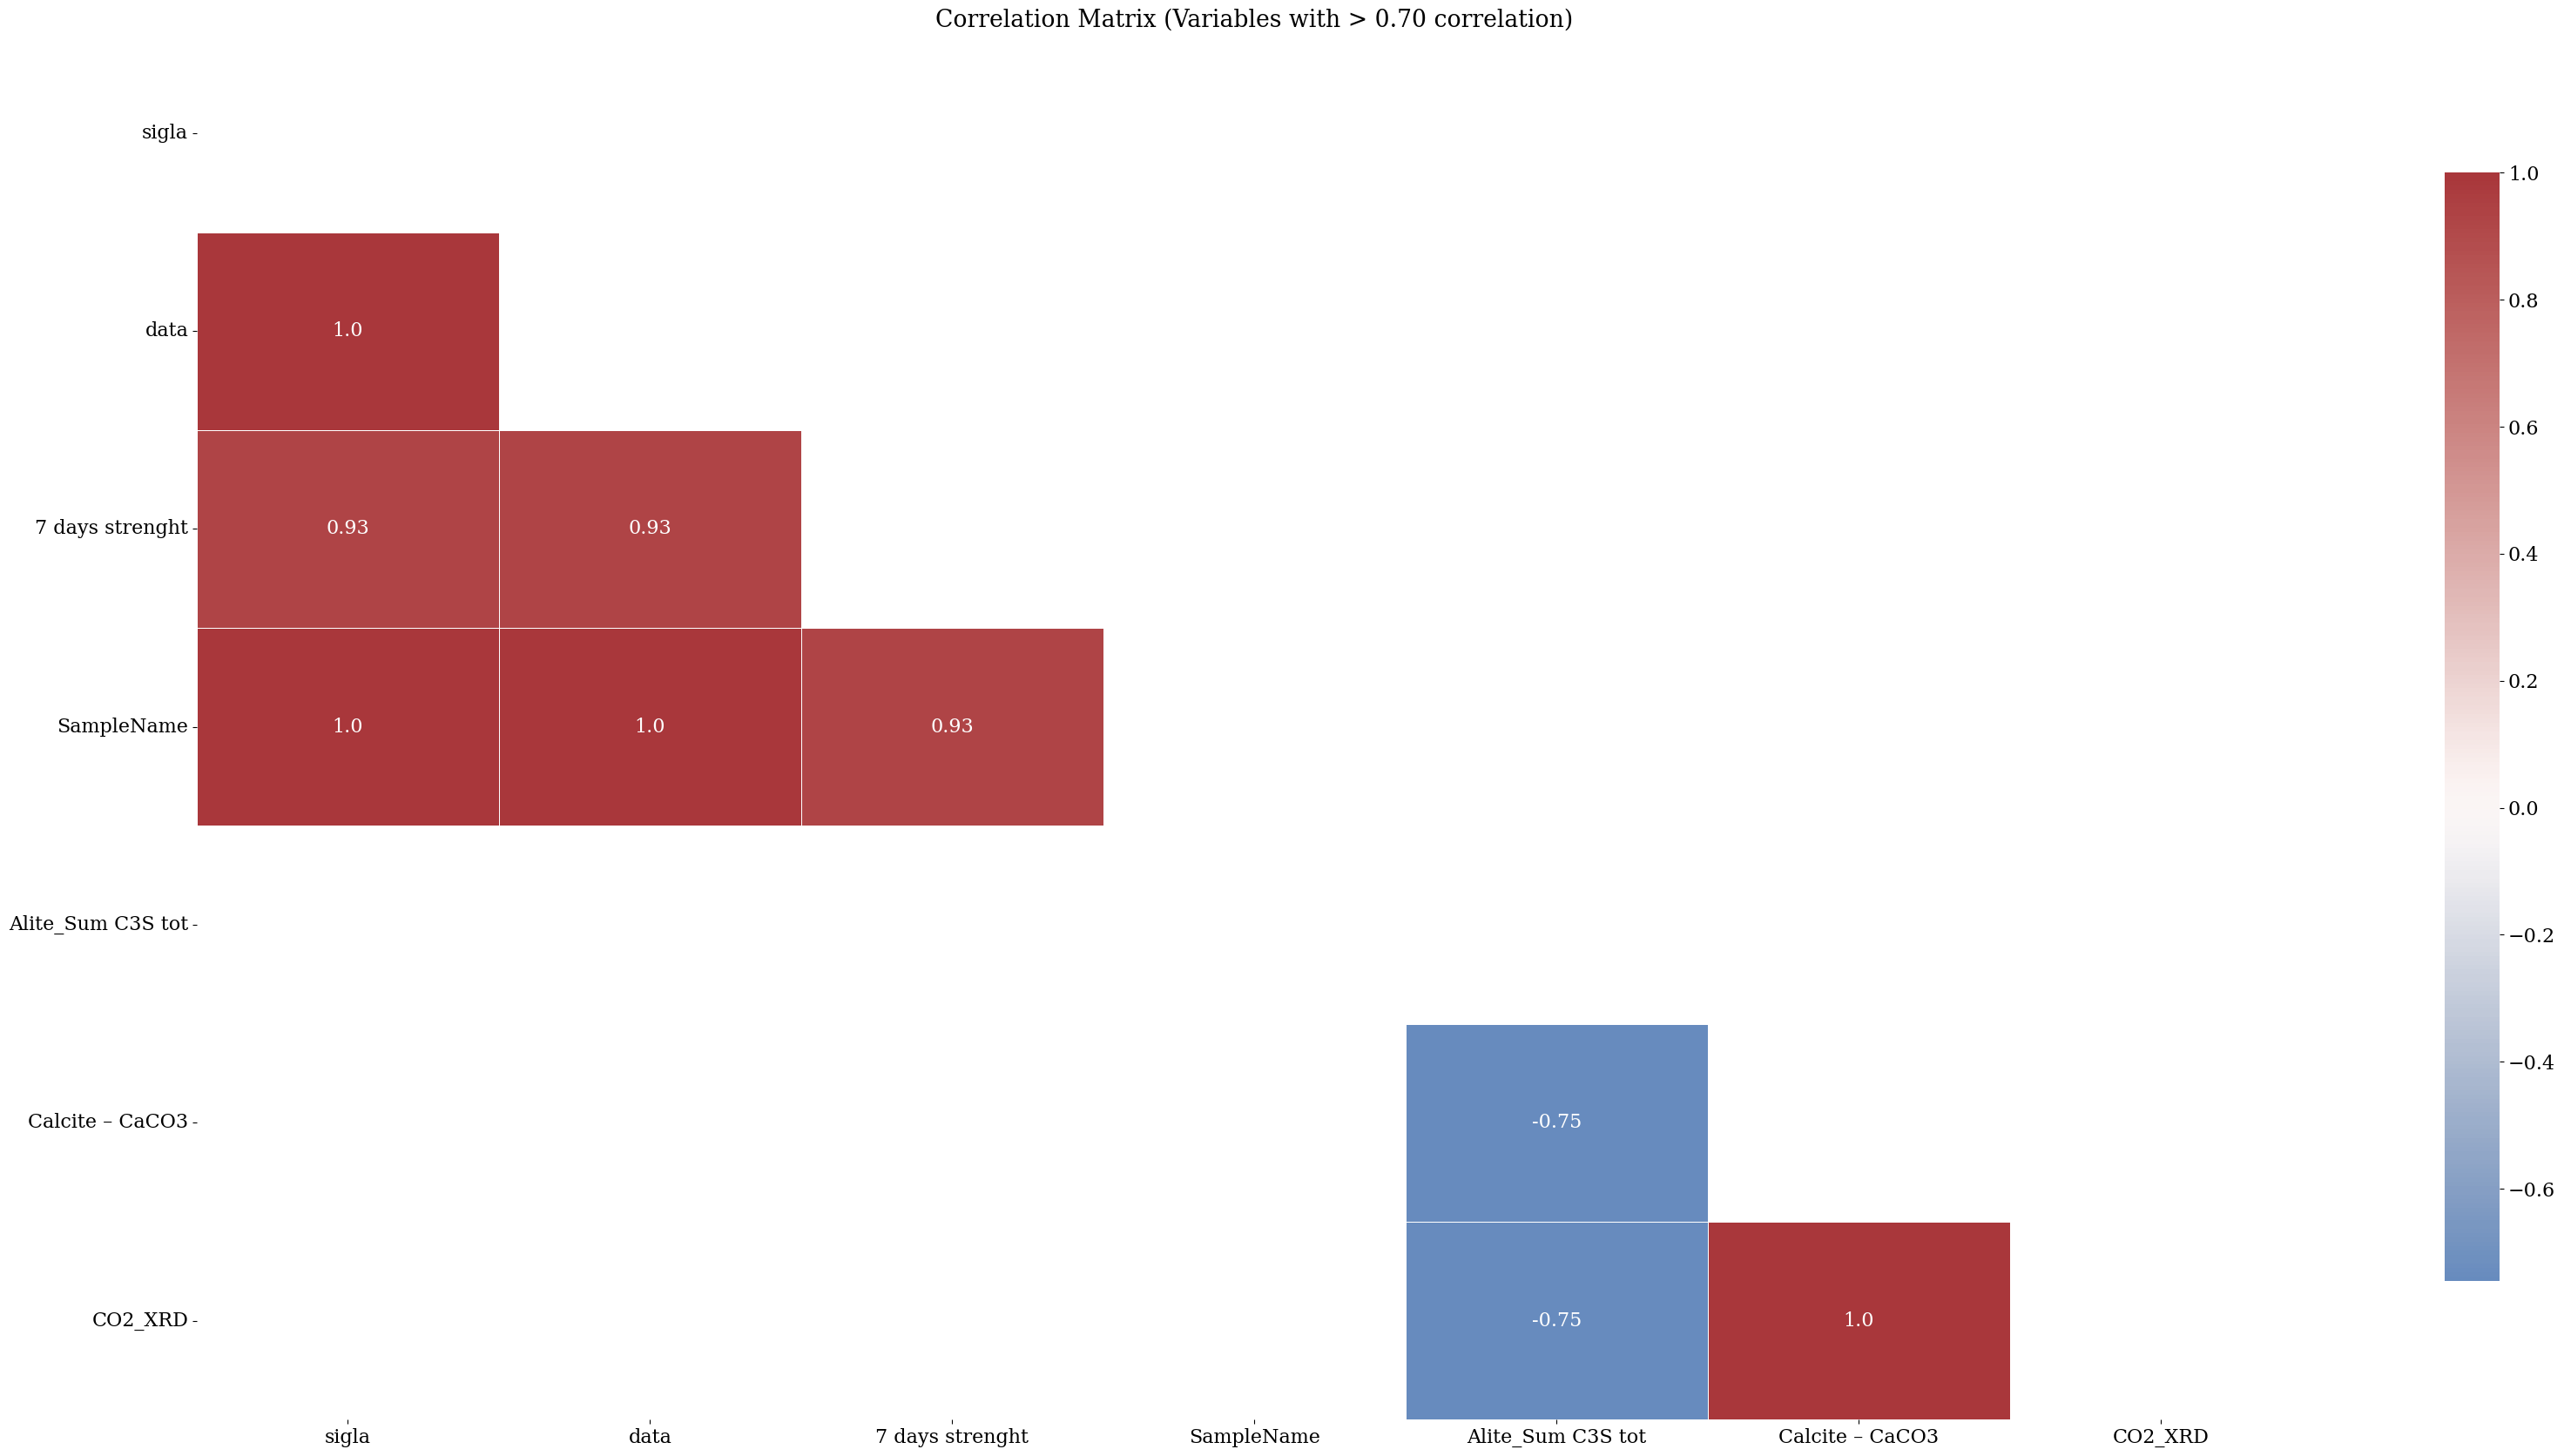

<IPython.core.display.Javascript object>

In [67]:


df_corr = df.select_dtypes(exclude=object).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()



In [68]:
corr_matrix = df.select_dtypes(exclude=object).corr(method="kendall").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

sigla              SampleName         1.000000
                   data               0.998113
data               SampleName         0.998110
Calcite – CaCO3    CO2_XRD            0.997944
sigla              7 days strenght    0.926316
data               7 days strenght    0.926316
7 days strenght    SampleName         0.926316
Alite_Sum C3S tot  CO2_XRD            0.745458
                   Calcite – CaCO3    0.745362
dtype: float64

<IPython.core.display.Javascript object>

In [69]:
sol[sol.index.map(lambda x: "28 days strenght" in x)]

2 days strenght       28 days strenght                       0.625126
28 days strenght      Calcite – CaCO3                        0.559773
                      CO2_XRD                                0.559427
                      Alite_Sum C3S tot                      0.557500
                      Quartz                                 0.512121
                      Alite_M1 C3S M1                        0.491419
                      C4AF                                   0.480807
Cl-                   28 days strenght                       0.410640
28 days strenght      Langbeinite – MgK2(SO4)2               0.389382
                      residuo 24 micron                      0.359362
                      SO3_XRD                                0.350809
                      C3A cub                                0.326046
                      Alite_M3 C3S M3                        0.274018
                      Gesso                                  0.251633
                    

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

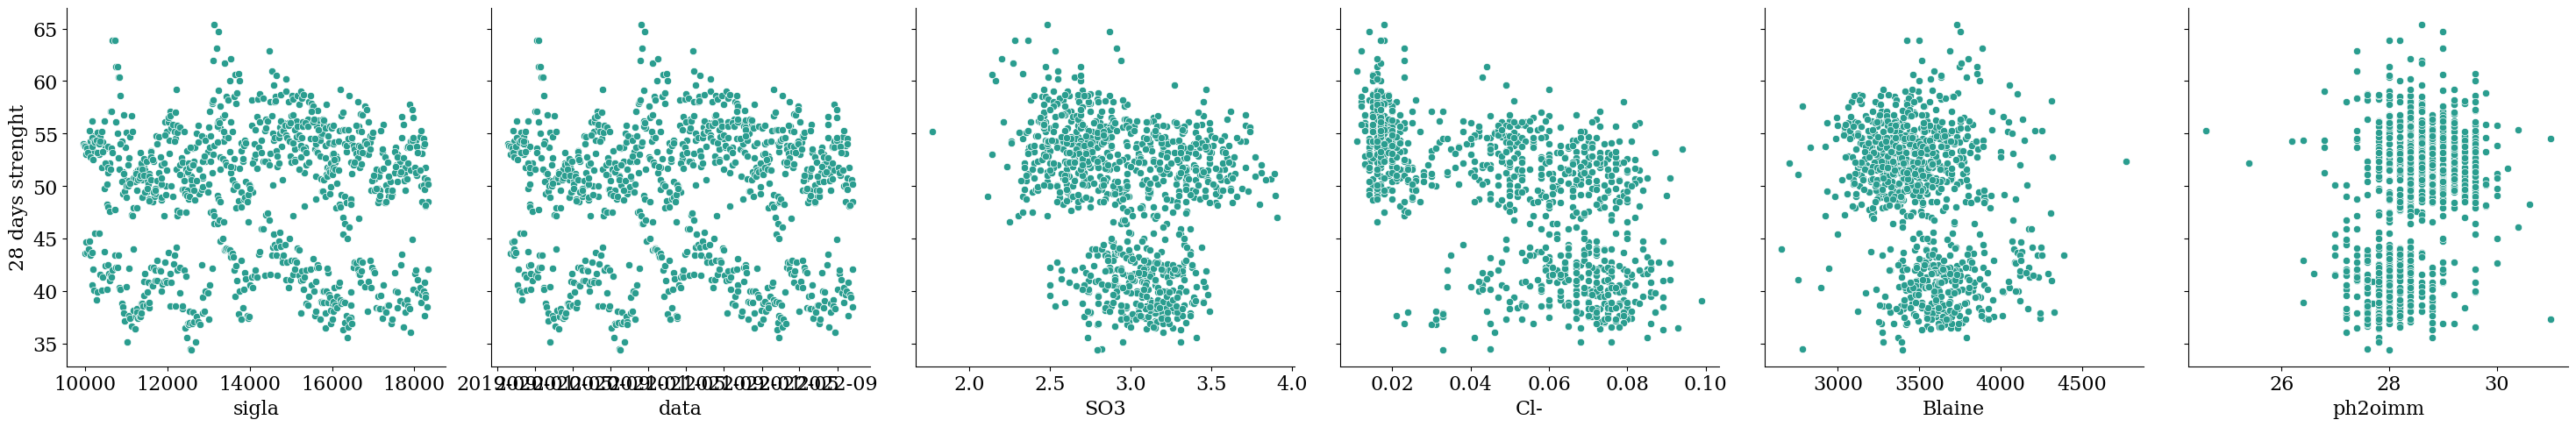

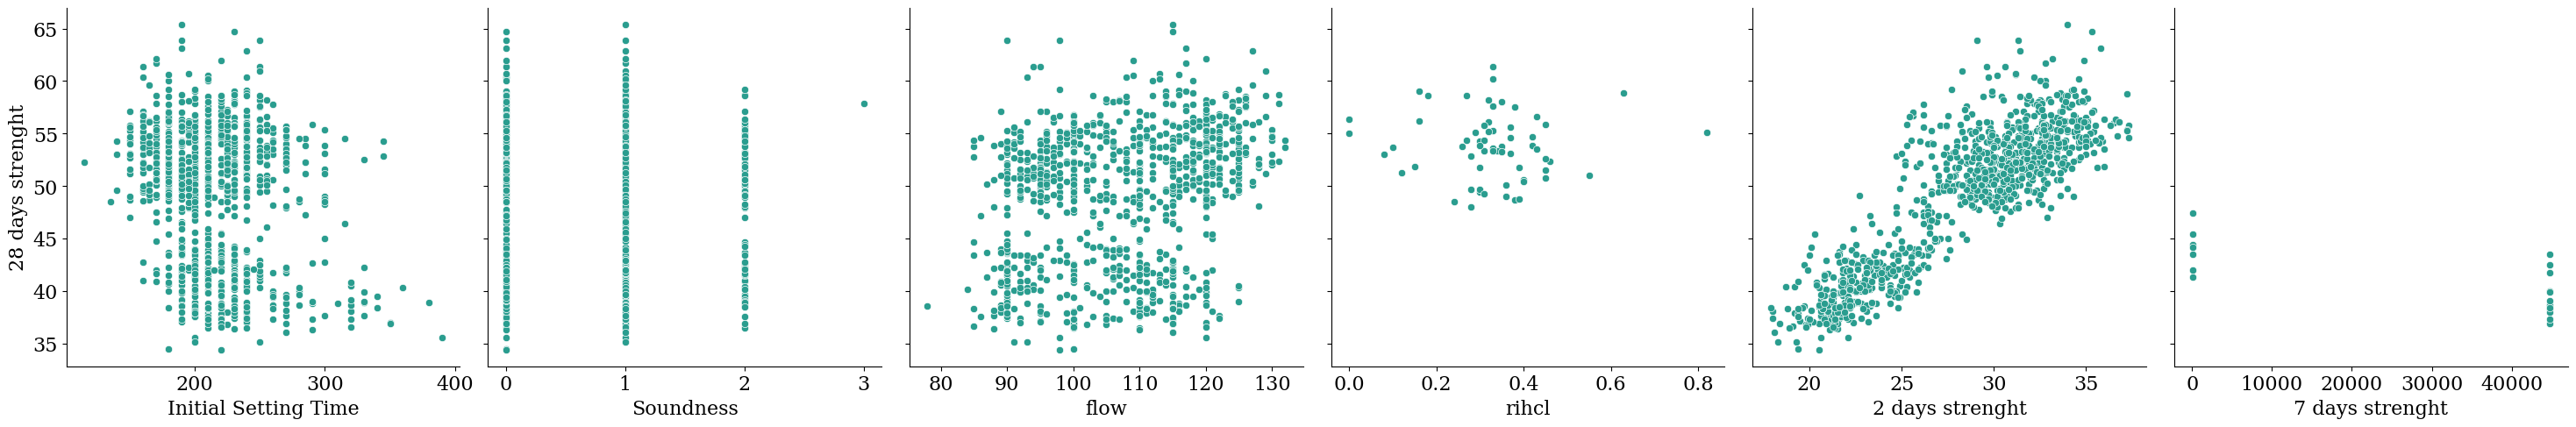

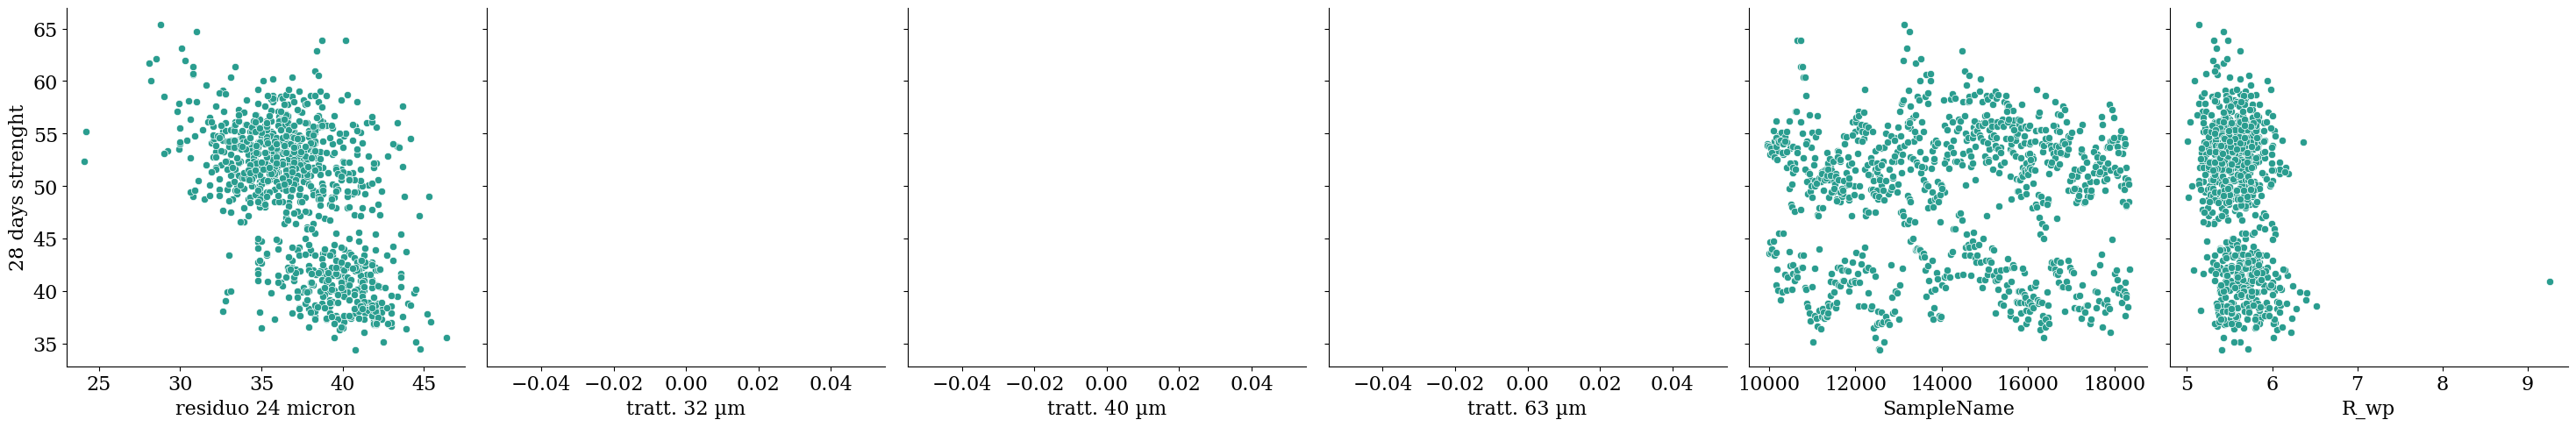

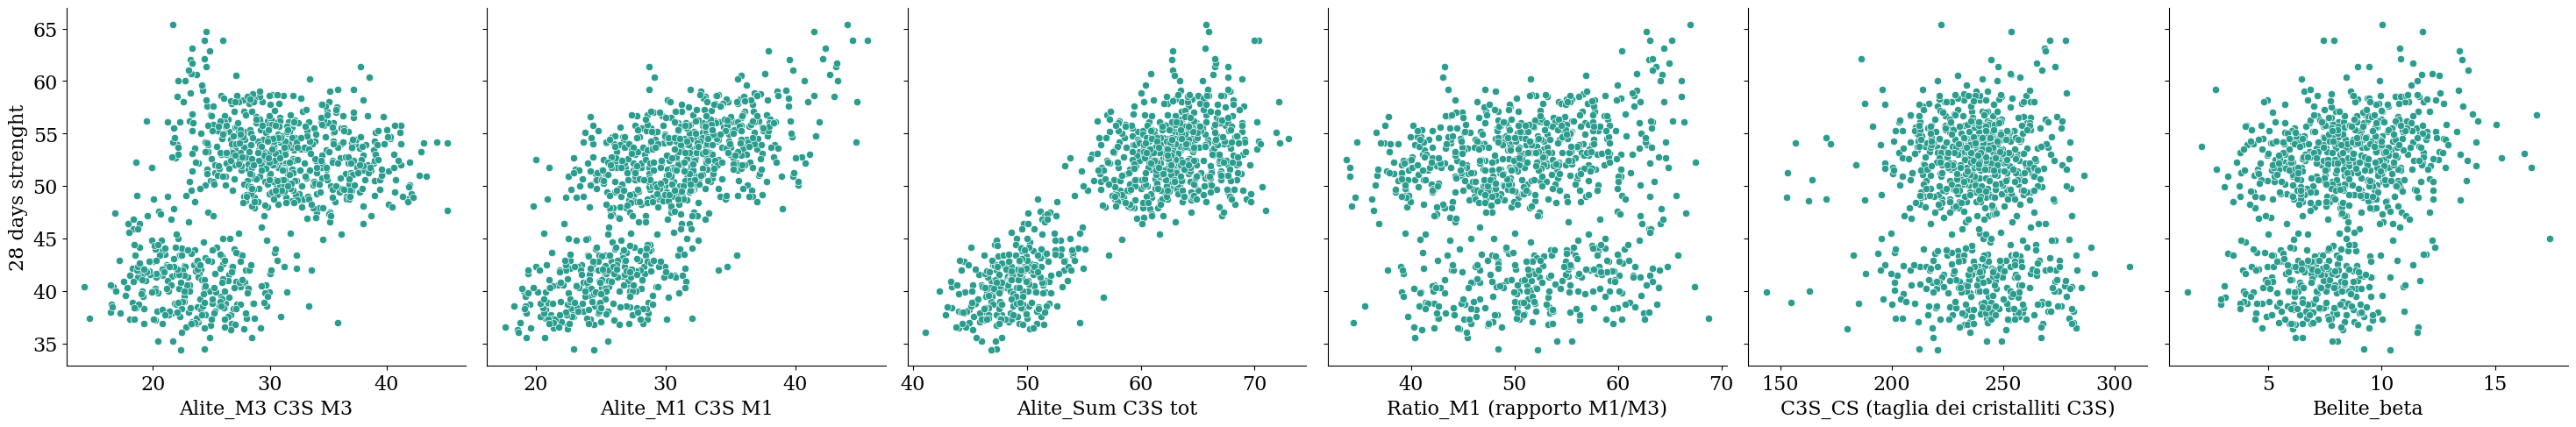

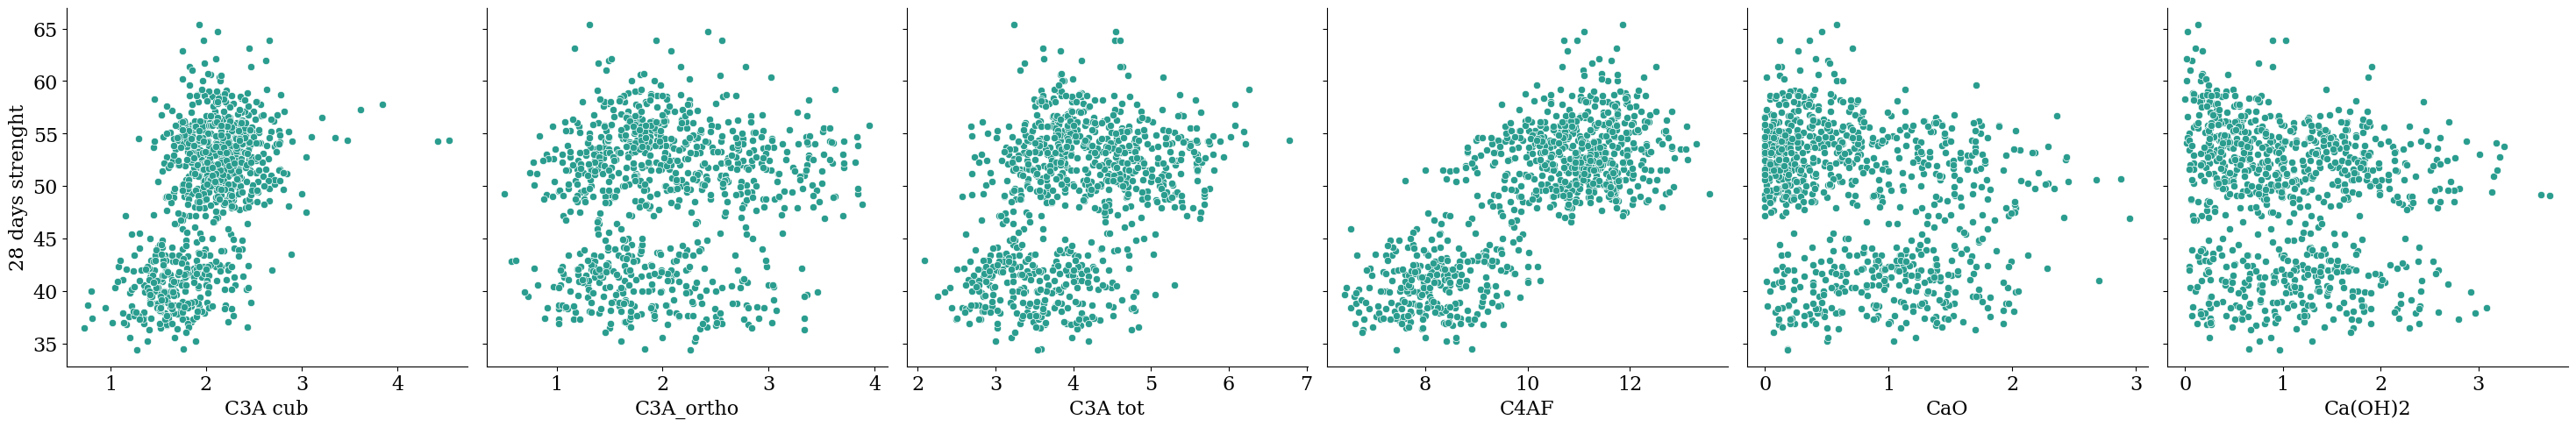

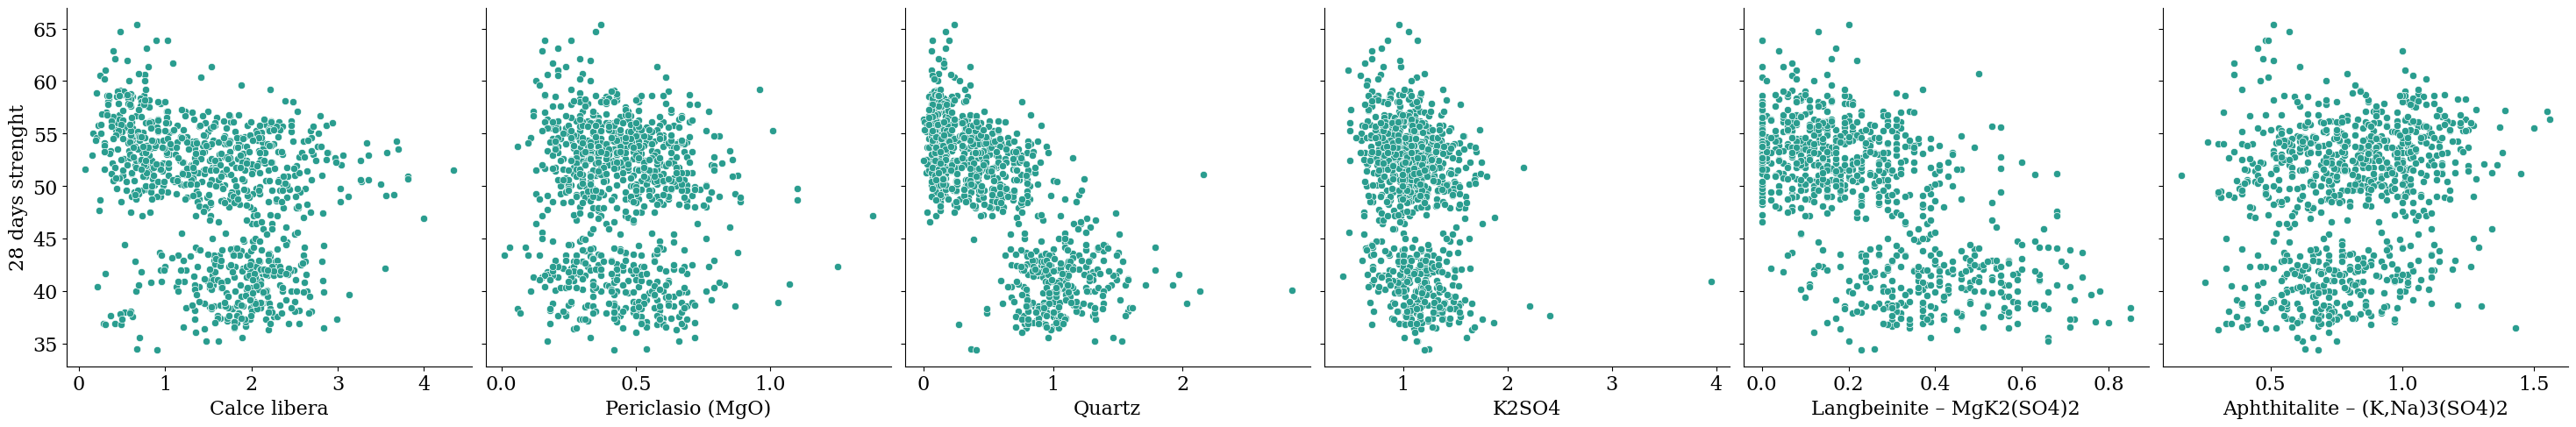

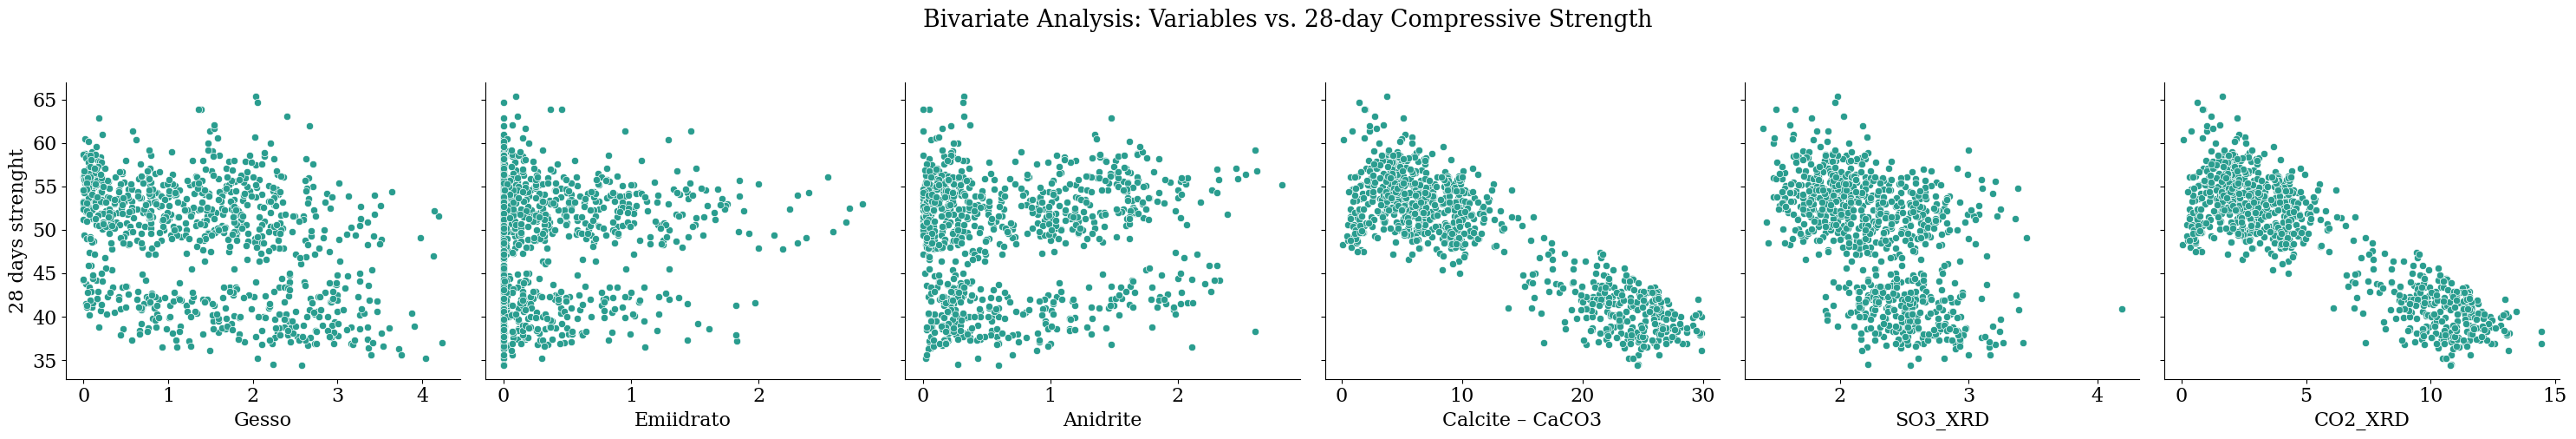

<IPython.core.display.Javascript object>

In [70]:
num_lines = 7
plots_per_line = 6

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("28 days strenght")


for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        data=df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["28 days strenght"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

grid.fig.suptitle(
    "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
)
plt.tight_layout()
plt.show()


In [71]:
# def corrfunc(x, y, ax=None, **kws):
#     """Plot the correlation coefficient in the top left hand corner of a plot."""
#     r, _ = pearsonr(x, y)
#     ax = ax or plt.gca()
#     ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
#     return None

<IPython.core.display.Javascript object>

In [72]:
# for pair in sol[sol > 0.75].index.values:
#     if pair[0] != pair[1]:
#         data = df[[pair[0], pair[1]]].dropna()
#         g = sns.pairplot(
#             data,
#             corner=True,
#             kind="reg",
#             plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
#         )
#         corrfunc(data[pair[0]], data[pair[1]])
#         g.set(xticklabels=[])
#         g.set(yticklabels=[])

# plt.tight_layout()

<IPython.core.display.Javascript object>

### 4. Data/Hora Variable Analyses

In [73]:
dates

0     2019-10-25
1     2019-10-31
2     2019-11-04
3     2019-11-06
4     2019-11-11
         ...    
972   2022-10-28
973   2022-11-04
974   2022-11-05
975   2022-11-09
976   2022-11-11
Name: data, Length: 977, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

494 valid days out of 528


<IPython.core.display.Javascript object>

In [75]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2019, 2020, 2021, 2022}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2019: {10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10       12
      11       14
      12       13
2020  1        16
      2        13
      3        13
      4        15
      5        13
      6        14
      7        15
      8        14
      9        13
      10       14
      11       13
      12       12
2021  1        13
      2        13
      3        14
      4        14
      5        13
      6        13
      7        14
      8        15
      9        14
      10       12
      11       19
      12       18
2022  1        14
      2        13
      3        15
      4        16
      5        13
      6        14
      7        14
      8        16
      9        14
      10       15
      11        8
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

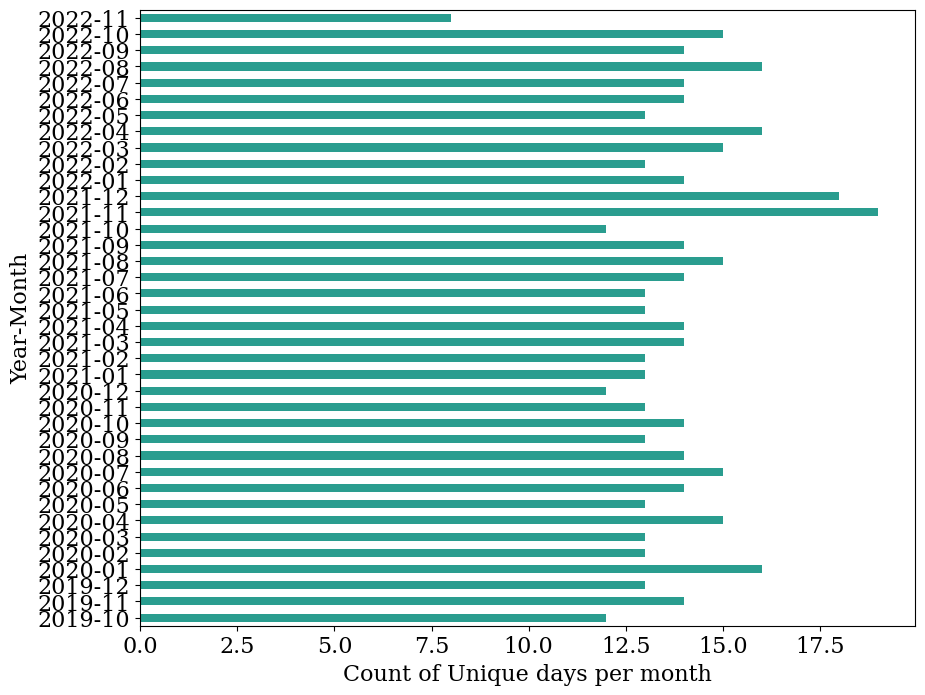

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2019  10       17
      11       25
      12       24
2020  1        27
      2        26
      3        24
      4        30
      5        25
      6        27
      7        28
      8        27
      9        26
      10       25
      11       26
      12       25
2021  1        24
      2        24
      3        29
      4        25
      5        27
      6        26
      7        25
      8        26
      9        27
      10       25
      11       31
      12       29
2022  1        26
      2        28
      3        29
      4        28
      5        23
      6        27
      7        25
      8        29
      9        25
      10       24
      11       13
Name: size, dtype: int64


<IPython.core.display.Javascript object>

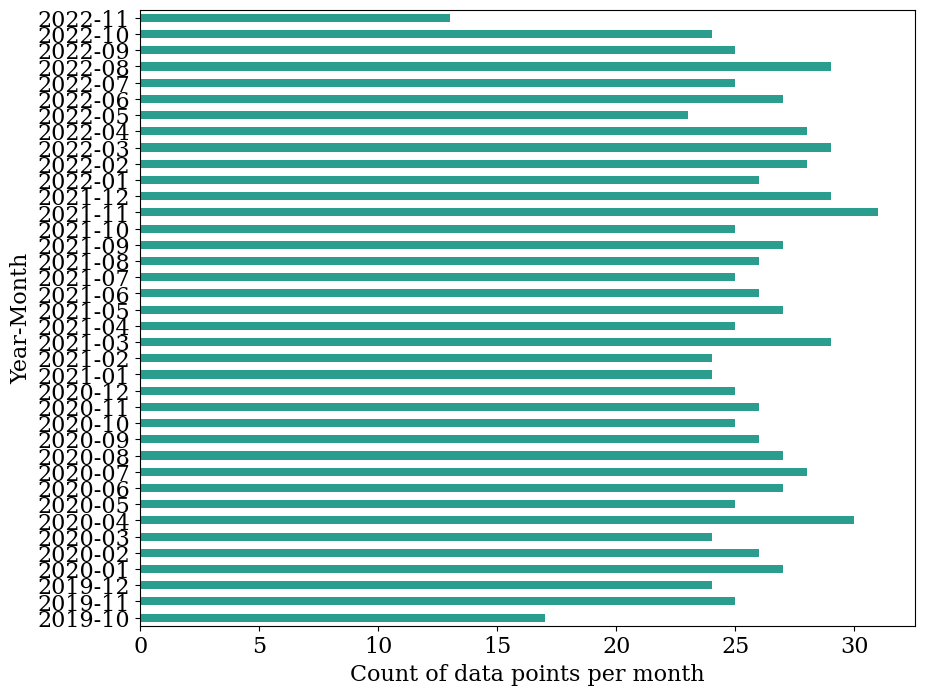

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 8))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2022-11 has the minimum number of days with samples - 13
2021-11 has the maximum number of days with samples - 31


<IPython.core.display.Javascript object>

In [82]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  528.000000
mean     1.850379
std      0.785519
min      1.000000
25%      1.000000
50%      2.000000
75%      2.000000
max      4.000000

<IPython.core.display.Javascript object>

In [83]:
day_counts[["DayCount"]].value_counts()

DayCount
1           205
2           200
3           120
4             3
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [84]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
34   2019     12   17         4
333  2021     10   14         4
400  2022      2   24         4

<IPython.core.display.Javascript object>

In [85]:
df_copy = df.copy()
df_copy["date"] = pd.to_datetime(df_copy["data"])
df_copy["Year"] = df_copy["date"].dt.year
df_copy["Month"] = df_copy["date"].dt.month
df_copy["Day"] = df_copy["date"].dt.day

df_merge = df_copy.merge(right=day_counts, how="left", on=["Year", "Month", "Day"])

uniques = df_merge["DayCount"].unique()
uniques.sort()

for daycount in uniques:
    nulls = df_merge[df_merge["DayCount"] == daycount]["28 days strenght"].isna().sum()
    print(daycount, nulls)

1 5
2 8
3 6
4 0


<IPython.core.display.Javascript object>

In [86]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i - 1])
# diffs

<IPython.core.display.Javascript object>

In [87]:
# Average Frequency
np.mean(diffs)

Timedelta('1 days 03:22:07.868852459')

<IPython.core.display.Javascript object>

In [88]:
Counter(diffs)

Counter({Timedelta('2 days 00:00:00'): 351,
         Timedelta('5 days 00:00:00'): 319,
         Timedelta('1 days 00:00:00'): 124,
         Timedelta('6 days 00:00:00'): 104,
         Timedelta('4 days 00:00:00'): 28,
         Timedelta('3 days 00:00:00'): 23,
         Timedelta('0 days 00:00:00'): 10,
         Timedelta('7 days 00:00:00'): 6,
         Timedelta('10 days 00:00:00'): 3,
         Timedelta('12 days 00:00:00'): 3,
         Timedelta('11 days 00:00:00'): 3,
         Timedelta('-1134 days +00:00:00'): 1,
         Timedelta('-1120 days +00:00:00'): 1})

<IPython.core.display.Javascript object>

/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/peressim/virtual_environments/ccs28-venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is de

<Axes: xlabel='count'>

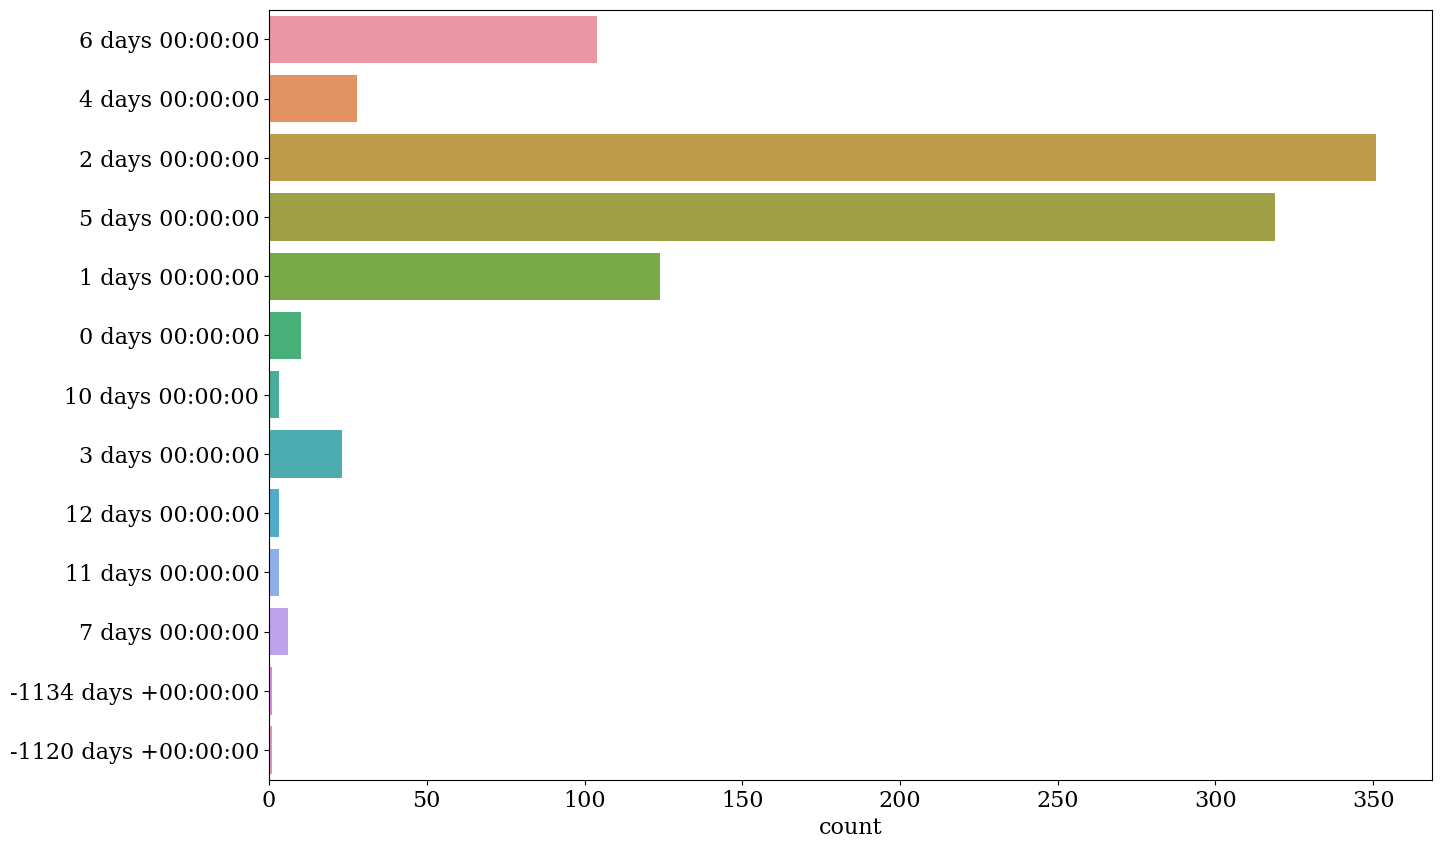

<IPython.core.display.Javascript object>

In [89]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [90]:
# percent of diffs
[round(val / df.shape[0] * 100, 2) for val in list(Counter(diffs).values())]

[10.64,
 2.87,
 35.93,
 32.65,
 12.69,
 1.02,
 0.31,
 2.35,
 0.31,
 0.31,
 0.61,
 0.1,
 0.1]

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 2 Days

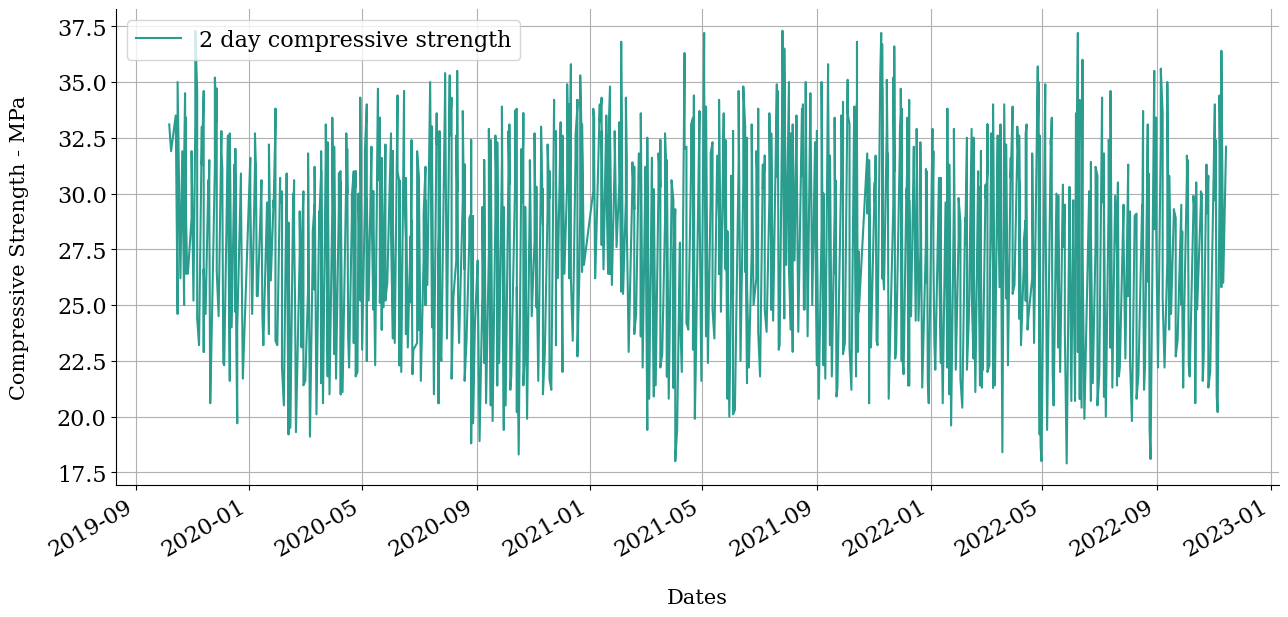

<IPython.core.display.Javascript object>

In [91]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "2 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["2 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 7 Days

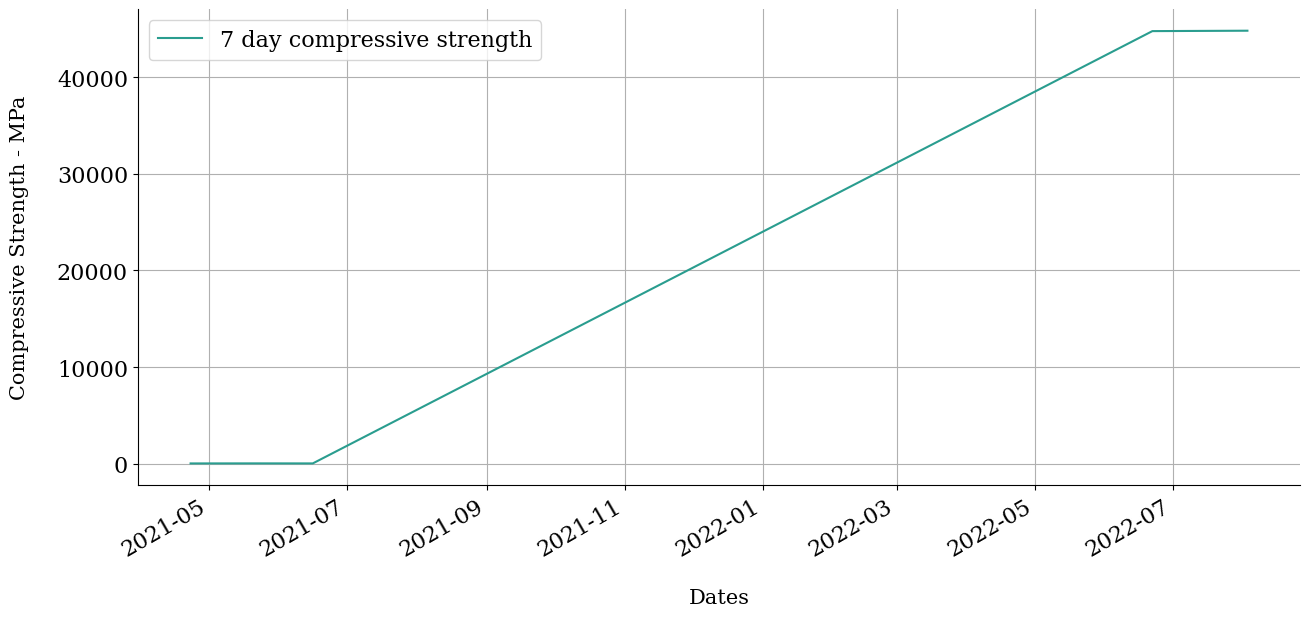

<IPython.core.display.Javascript object>

In [92]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "7 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

#### 28 Days

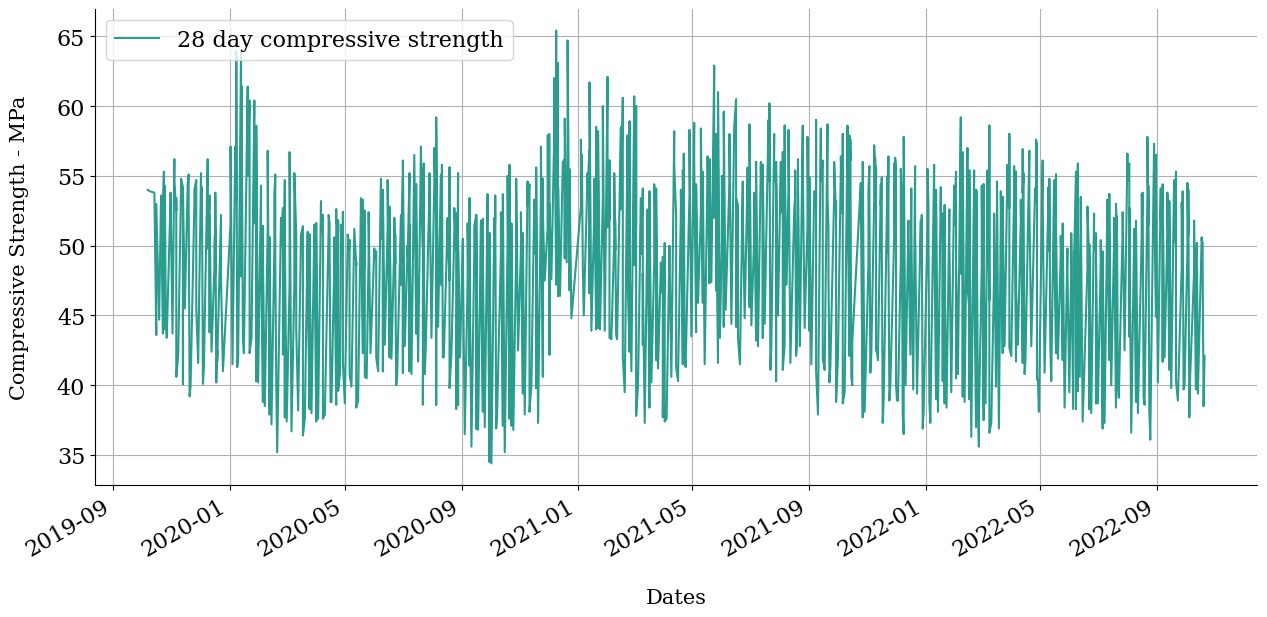

<IPython.core.display.Javascript object>

In [93]:
df["Date"] = pd.to_datetime(pd.to_datetime(df["data"]).dt.date)
tmp = df[["Date", "28 days strenght"]].dropna().copy()
tmp["Date"] = pd.to_datetime(tmp["Date"], format="%d/%m/%Y")
tmp = tmp.set_index("Date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()